##### Importing Libraries

In [1]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Geo visualisations
import folium


%matplotlib inline   


In [2]:
# For suppressing warning messages
import warnings

warnings.filterwarnings('ignore')

##### Changing default figure size 

In [3]:
## Changing default figure size using rcParams

print("Earlier, figure default size was: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (10, 5)
print("Now, figure default size is: ", plt.rcParams["figure.figsize"])

Earlier, figure default size was:  [6.4, 4.8]
Now, figure default size is:  [10.0, 5.0]


##### Applying theme for notebook

In [4]:
# Setting theme for charts

plt.style.use('ggplot')

##### Increasing Row/Col display limit 

In [5]:
# NOTE : New function

# Extending the default setting for maximum displayable rows/columns in Jupyter
# If not used, Jupyter wll truncate some rows and columns by default. 

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 1000

##### Changing working directory`

In [6]:
import os
#os.chdir("C:\\Users")
try:
    print('Current working directory is ----    '+ os.getcwd())
    os.chdir("D:\\Relevel\\Week 13_Day5\Data")
    print('Changed working directory is ----    '+ os.getcwd())

except FileNotFoundError:
    print("Directory not found. Continuing with the current working directory.")
    
# Rest of your code continues from here...

Current working directory is ----    C:\Users\rajpu\OneDrive\Desktop\Python class\Relevel class\Level 3\Module 1 (Advanced Python and its implementation)\07 EDA Case Study II - Supermarket Sales Analysis 11112022
Directory not found. Continuing with the current working directory.


# EDA - Supermarket Sales

## 1.  Introduction

This case study presents a real world alike scenario where important decisions are influenced by the data driven insights. We'll explore the transaction level data sales data of a supermarket chain , and derive useful business insights.

### Objective

The supermarket chain wants to run some promotions and they have a fixed budget for the same. Business wants insights from the data on how to most efficiently allocate these funds.

The objectives are as following -

•	Provide insights to Marketing head for allocating funds. The funds should be allocated in such a way so that the promotional return can be maximized.

•	Any new Strategy or strategy changes suggestions to improve revenue.


### Data 

•	The data belongs to a supermarket chain in Myanmar, with stores in 3 cities.

•	This is a sampled data of 1000 transactions and 20 fields for each transaction

•	All transactions belong to year 2019


### Data Dictionary

Reading data dictionary - 

In [7]:
data_dict = pd.read_csv("data_dict.csv")

data_dict.head(20)

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a...
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has st...
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


## 2. Data Wrangling

Reading data file using pandas - 

(Please note the style function used to color code the quantitative fields. A really useful method to visualise the data with the data ingestion  )

In [8]:
sales_data = pd.read_csv("supermarket_sales.csv")

sales_data.head(5).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900


##### Checking shape of data 

In [9]:
shape=sales_data.shape
print(f'The sales data has {shape[0]} rows and {shape[1]} columns')

The sales data has 1000 rows and 20 columns


##### 5 Number summary

In [10]:
# Checking 5 point summary with describe function

sales_data.describe().style.background_gradient(cmap='GnBu')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1000.000000,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


Following are the observations from 5 number summary - 

* Unit Price has range of 10-99, with mean price of 55
* Avg qty ordered per transaction is 6.5, the range being 1-14
* Invoice total mean is 323, and the range is 10-1042
* Gross Margin is constant as 4.76%
* Mean rating is 7.46/10

##### Data types and Null counts 

.info() function is used to check data types of all variables and null counts. 

In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

### Data Imputation 

As discussed in Credit Risk case study, data imputation is a necessary step so as to avoid misleading insights. It also makes the dataframe compatible with most of the analytical and visual functions. 

##### Checking Null %s 

Let's first check the columns which have NULL values and then we can impute in those fields one by one - 

In [12]:
# Null % for all columns in data

null_perc = sales_data.isnull().sum()/len(sales_data)*100

null_perc.sort_values(ascending = False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
City                        0.0
CustomerID                  0.0
Unit price                  0.0
Quantity                    0.0
Date                        0.0
Total                       0.0
cogs                        0.0
Time                        0.0
gross margin percentage     0.0
gross income                0.0
Longitude                   0.0
Latitude                    0.0
dtype: float64

We have 7 fields with NULLs, with "Branch" having maximum NULLs ( 19.4%)

Making a copy of data for Data Wrangling section and further EDA, so that the original data stays as it is in case it is required for further reference later. 

In [13]:
sales_data_2 = sales_data.copy()

##### Imputing NULLs for Ratings

Ratings can be imputed with Mean rating values

In [14]:
sales_data_2.Rating.mean()

np.float64(7.462625437572928)

In [15]:
sales_data_2['Rating'] = sales_data_2['Rating'].fillna(sales_data_2.Rating.mean())

##### Imputing NULLs for Tax

From the data we can see that Tax is 5% of the Invoice value always. We can impute nulls using the same formula as below - 

In [16]:
tax_perc = sales_data_2['Tax 5%']*100/sales_data_2['Total']
tax_perc.head(20)

0     5.0
1     5.0
2     5.0
3     5.0
4     5.0
5     5.0
6     5.0
7     5.0
8     5.0
9     5.0
10    5.0
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
dtype: float64

In [17]:
sales_data_2['Tax 5%'] = sales_data_2['Tax 5%'].fillna(sales_data_2['Total']*0.05)

Mode is a common way to fill in Categorical variables unless there is a linkage among variables ( As in case of Branch).
Thus, it is better to define a function which can be used multiple times for such variables - 

In [18]:
# The function is written in such a way that it displays the mode and confirms that the mode imputation is complete

def impute_mode(col):
    print("The mode of this field is :  " + sales_data_2[col].mode()[0])
    sales_data_2[col] = sales_data_2[col].fillna(sales_data_2[col].mode()[0])
    print("Mode value imputed")
    
    

##### Imputing NULLs for Payment

Payments can be imputed with Mode as there is no logical way to find out what method was used.

In [19]:
impute_mode('Payment')

The mode of this field is :  Ewallet
Mode value imputed


##### Imputing NULLs for Customer Type

Customer Type has just 5% of Nulls and it is better to complete the data with mode imputation than leaving it as it is

In [20]:
impute_mode('Customer type')

The mode of this field is :  Normal
Mode value imputed


##### Imputing NULLs for Gender

Similar to Customer type, Gender also has lower % of NULLs and can be imputed with Mode

In [21]:
impute_mode('Gender')

The mode of this field is :  Female
Mode value imputed


##### Imputing NULLs for Product Line

In [22]:
impute_mode('Product line')

The mode of this field is :  Health and beauty
Mode value imputed


##### Imputing NULLs for Branch

One can logically deduce that City and Branch must be linked. 
A quick look at the data using head() function would confirm the same as below - 

NOTE : drop_duplicates() can be used to find the unique values based on a set of fields. 

In [23]:
sales_data_2[['Branch','City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


Based on the above values, we can write the following logic to impute Branch as per the City values - 

In [24]:
for i in range(len(sales_data_2['Branch'])):

    if pd.isna(sales_data_2['Branch'][i]) == True :
        if(sales_data_2['City'][i].strip() == "Yangon"):
            sales_data_2['Branch'][i] = "A"
            print("NA imputed as Branch A")

        elif(sales_data_2['City'][i].strip() == "Naypyitaw"):
            sales_data_2['Branch'][i] = "C"
            print("NA imputed as Branch C")

        elif(sales_data_2['City'][i].strip() == "Mandalay"):
            sales_data_2['Branch'][i] = "B"
            print("NA imputed as Branch B")

        else:
            print("Invalid city")

NA imputed as Branch A
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch B
NA imputed as Branch B
NA imputed as Branch B
NA imputed as Branch B
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch A
NA imputed as Branch B
NA imputed as Branch A
NA imputed as Branch A
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch B
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch B
NA imputed as Branch C
NA imputed as Branch B
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch B
NA imputed as Branch B
NA imputed as Branch A
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch C
NA imputed as Branch A
NA imputed as Branch B
NA imputed as Branch B
NA imputed as Branch C
NA imputed 

##### Verifying NULL% after imputations

Finally we can verify that all columns have 0% NULLs suing the same logic as earlier for NULL % calculation - 

In [25]:
# Null % for all columns in data

null_perc = sales_data_2.isnull().sum()/len(sales_data_2)*100

null_perc.sort_values(ascending = False)

Invoice ID                 0.0
Branch                     0.0
CustomerID                 0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
Longitude                  0.0
Latitude                   0.0
dtype: float64

### Adding fields for timeseries analysis

Time based analysis becomes really crucial for a sales data. It can inform about patterns, peak & low seasons, events that trigger sales to be high or low etc. 
It is useful to extract data and have separate time fields for such analysis as done below - 

In [26]:

# Convert date columns into date time 

sales_data_2.Date = pd.to_datetime(sales_data_2.Date)

#Add a month,day and weekday columns
sales_data_2['month']=sales_data_2.Date.dt.month
sales_data_2['day']=sales_data_2.Date.dt.day
sales_data_2['weekday']=sales_data_2.Date.dt.day_name()

#Add a hour and minute columns 
sales_data_2['hour']=sales_data_2.Time.str[0:2]
sales_data_2['minute']=sales_data_2.Time.str[3:5]

#Make it int values
sales_data_2['hour']=pd.to_numeric(sales_data_2['hour'])
sales_data_2['minute']=pd.to_numeric(sales_data_2['minute'])

##### Checking final data types and NULL counts

In [27]:
sales_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   CustomerID               1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

## 2. Univariate Analysis ( Quantitative )

As already discussed in Day 4 session, we know that Univariate Analysis is simplest form of analysing data. It restricts the analysis to only 1 variable as the name states.

It doesn't take into account the mutual relationships and associations among variables. Rather it focuses on finding patterns through a particular field.


##### Function for Univariate Charts of quantitative fields - 

For our Univariate analysis in this case, we are going to plot Violinplot and Stripplot using Seaborn library.
Violinplot is a hybrid plot of Box lot & KDE plot which gives us insights about quartiles as well as distribution of a variable.
Stripplot is considered to be  good complement to Violinplot because one can see the individual data points along with the distribution. 

In [28]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=1,figsize=(20,12))                     # Defining 2 subplots, changing fig size
    axes[1].set_title( "Boxenplot of "+ col , size =14)                          # Chart title for Subplot 1
    sns.stripplot(sales_data_2[col],ax=axes[1], color="#4CB391")                 # Distplot in subplot 1


    axes[0].set_title("Violinplot for  " + col )                                 #  Title for Subplot 2
    sns.violinplot(sales_data_2[col],ax=axes[0], color="grey")                   # Violinplot in Subplot 2
    
                      
    plt.tight_layout()
    fig.savefig("univariate_"+col+".png") 

##### Unit Price

Univariate analysis of Unit Price will help us understand in general how the products are priced in supermarket catalogue 

Insights- 

* Unit price doesn't follow a normal distribution, it is more or less similar frequency for range 20-80


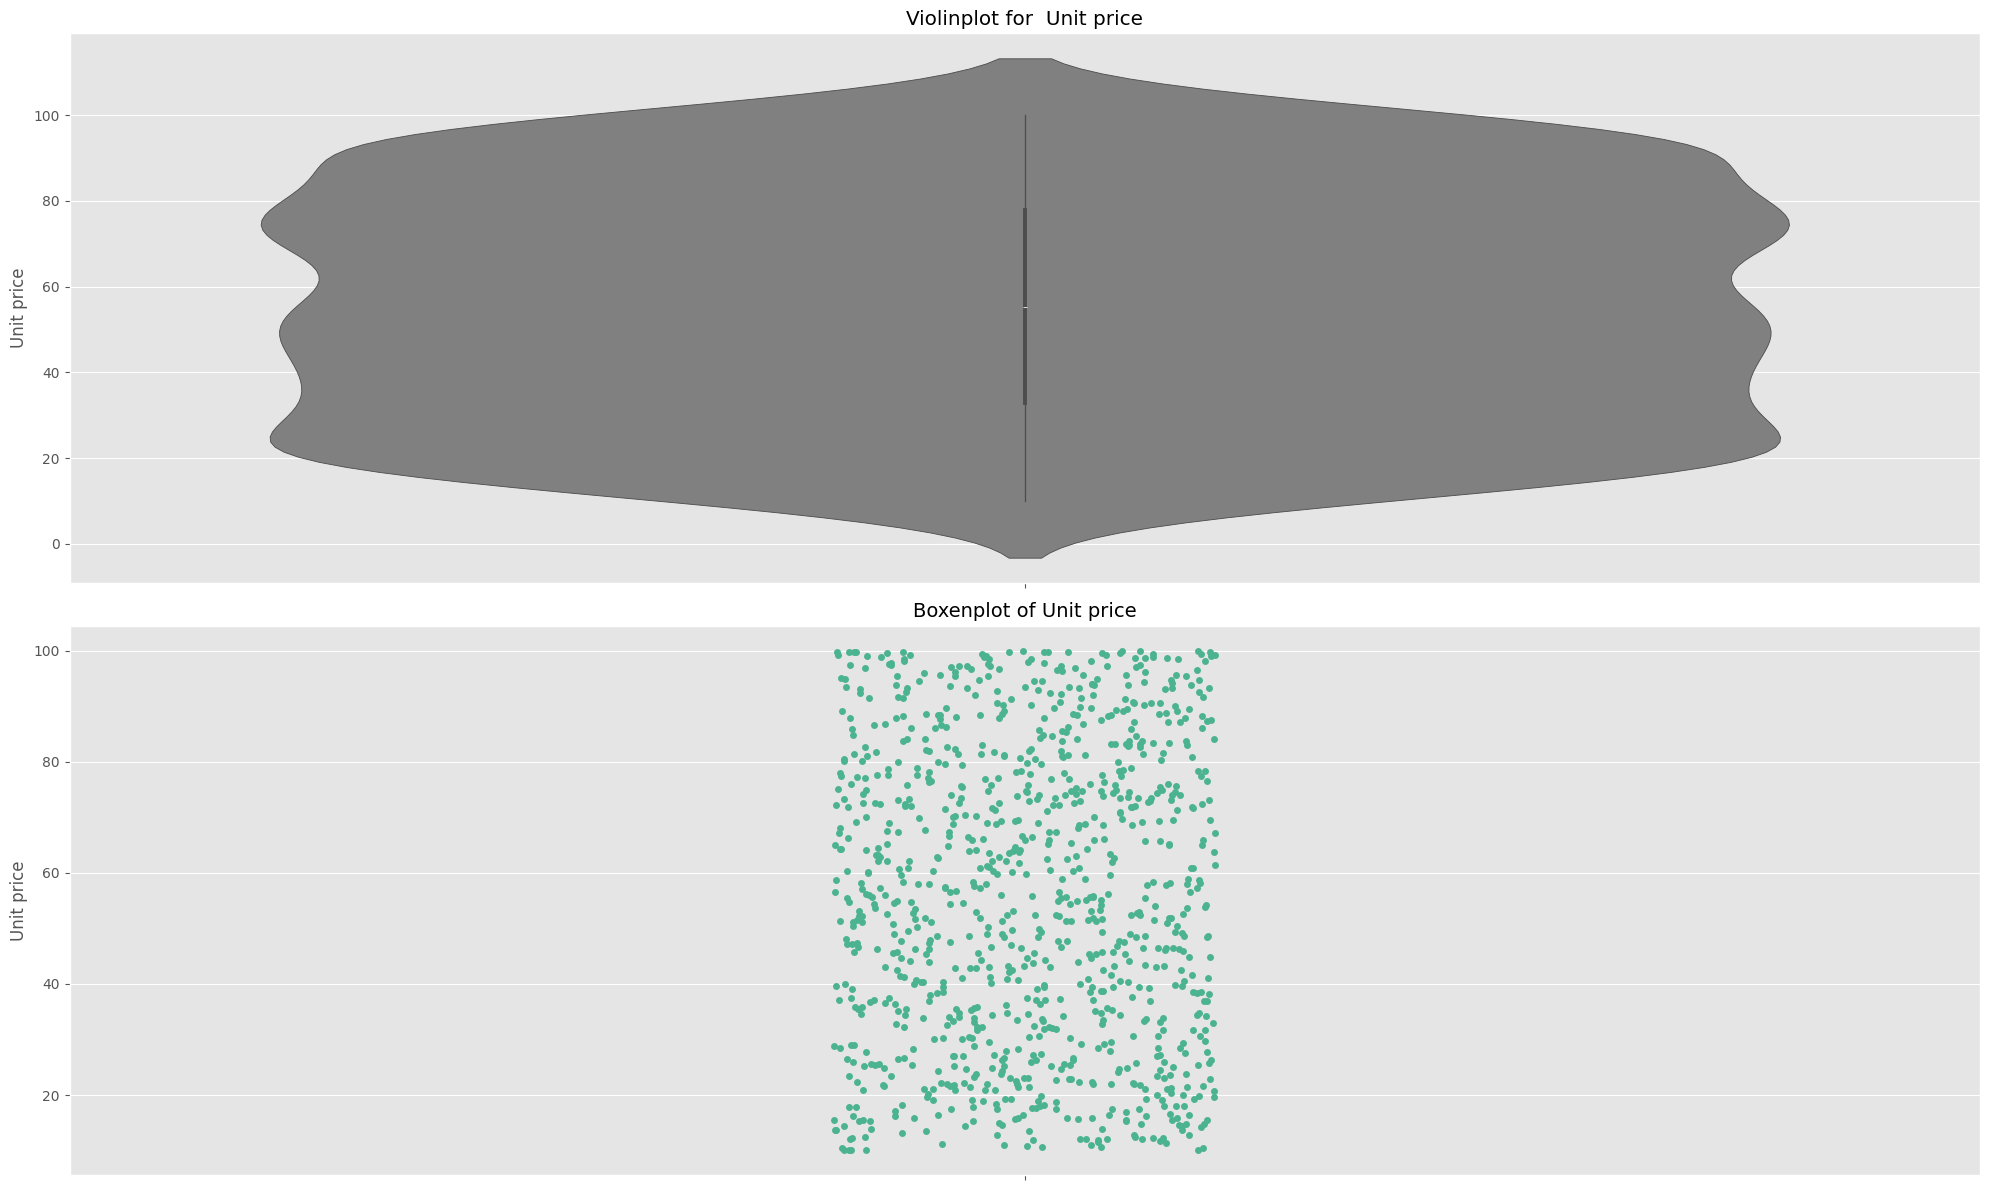

In [29]:
univariate_quant('Unit price')

##### Invoice Amount

Univariate analysis of Invoice Amount will help us understand in general how much is the bill amount per transaction 

Insights- 

* It has a right skewed distribution, with majority of values lying in under 500 range.


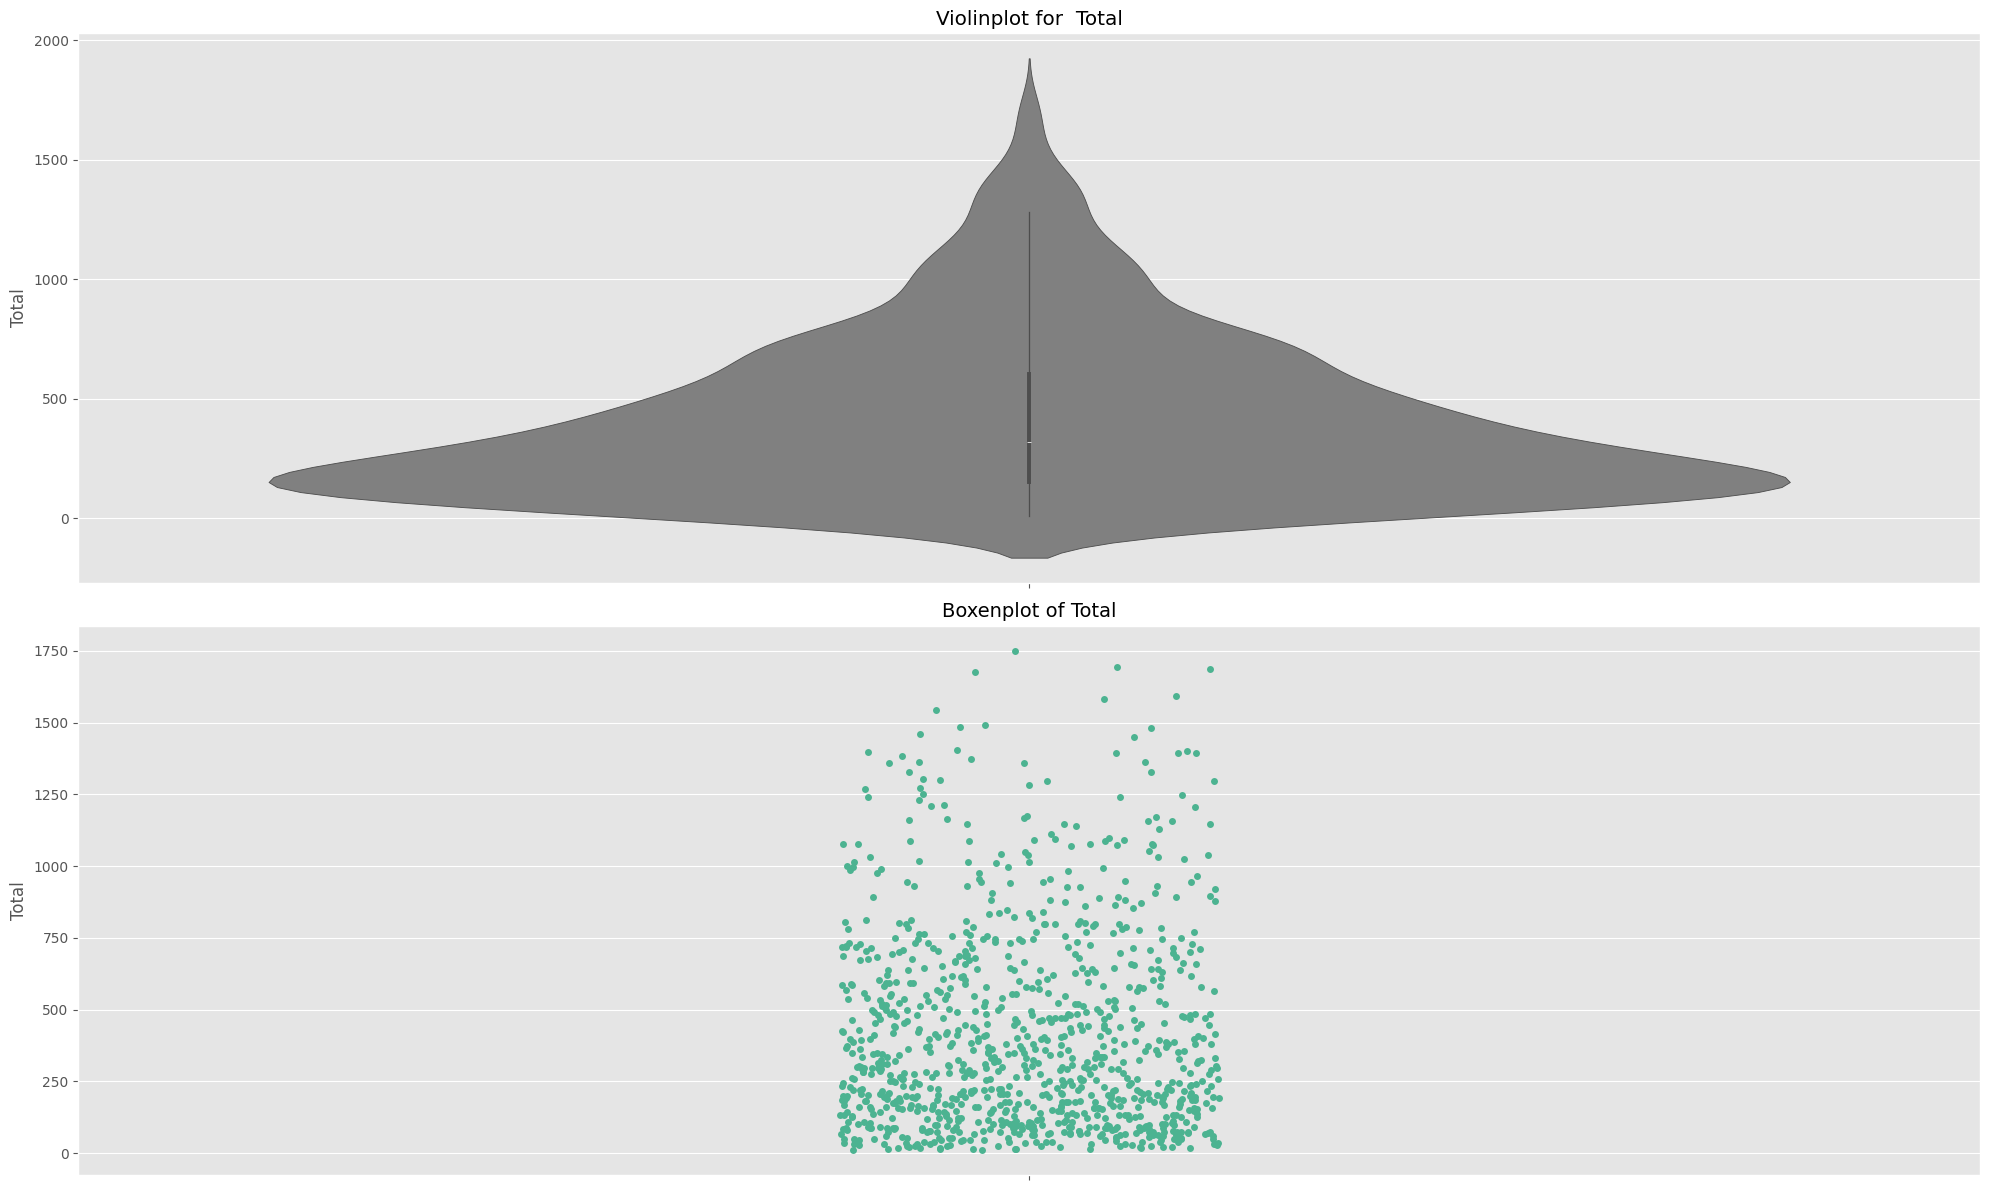

In [30]:
univariate_quant('Total')

##### Cost of Goods sold

Insights- 

* It also has a right skewed distribution, with majority of values lying in under 600 range.
* It is apparent that  Invoice amount and COGS might be realted with some mathermatical rule/equation.  


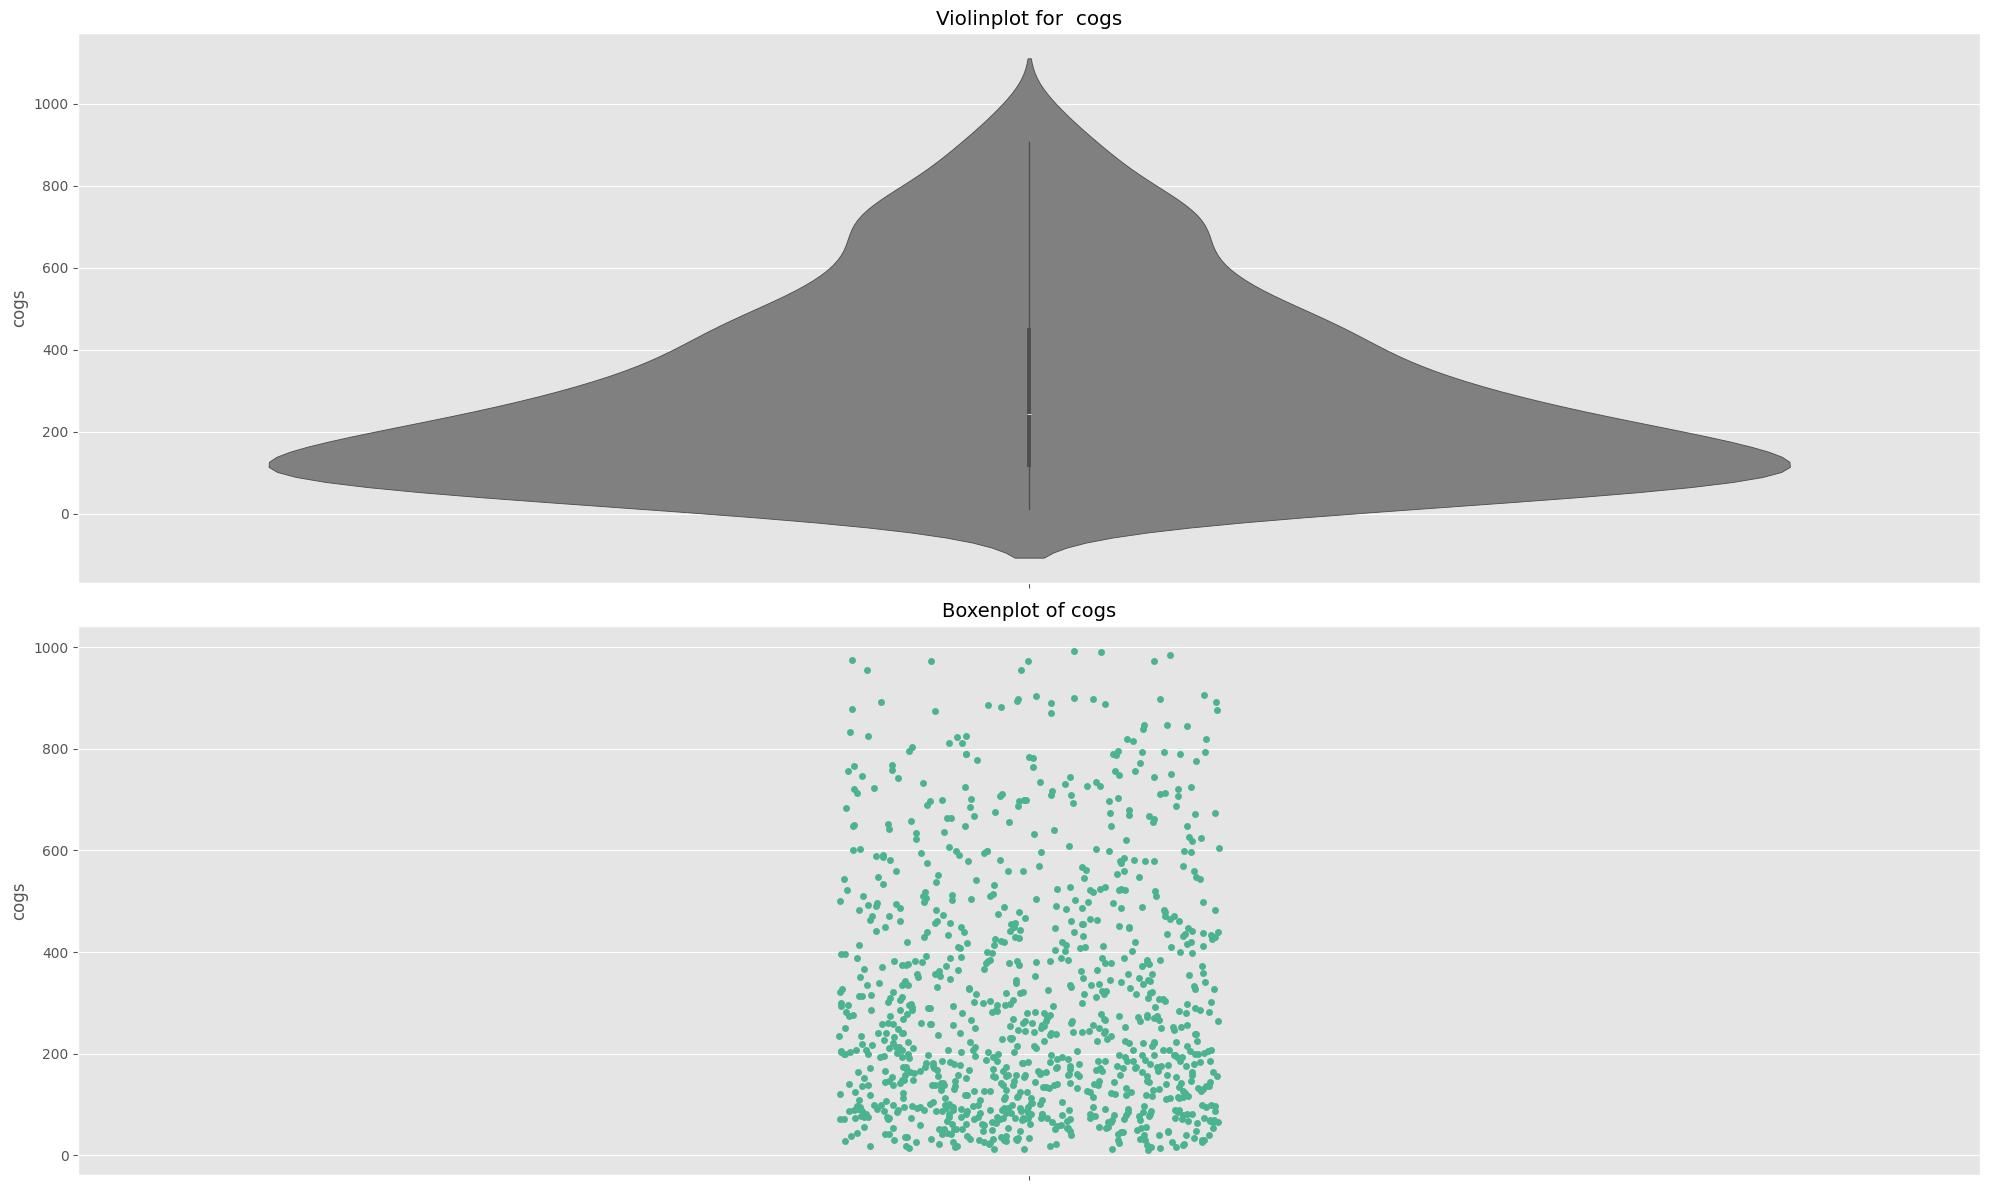

In [31]:
univariate_quant('cogs')

##### Gross Income

Insights- 

* Since gross income is derived out of Invoice amount and COGS, the distribution is similar. 


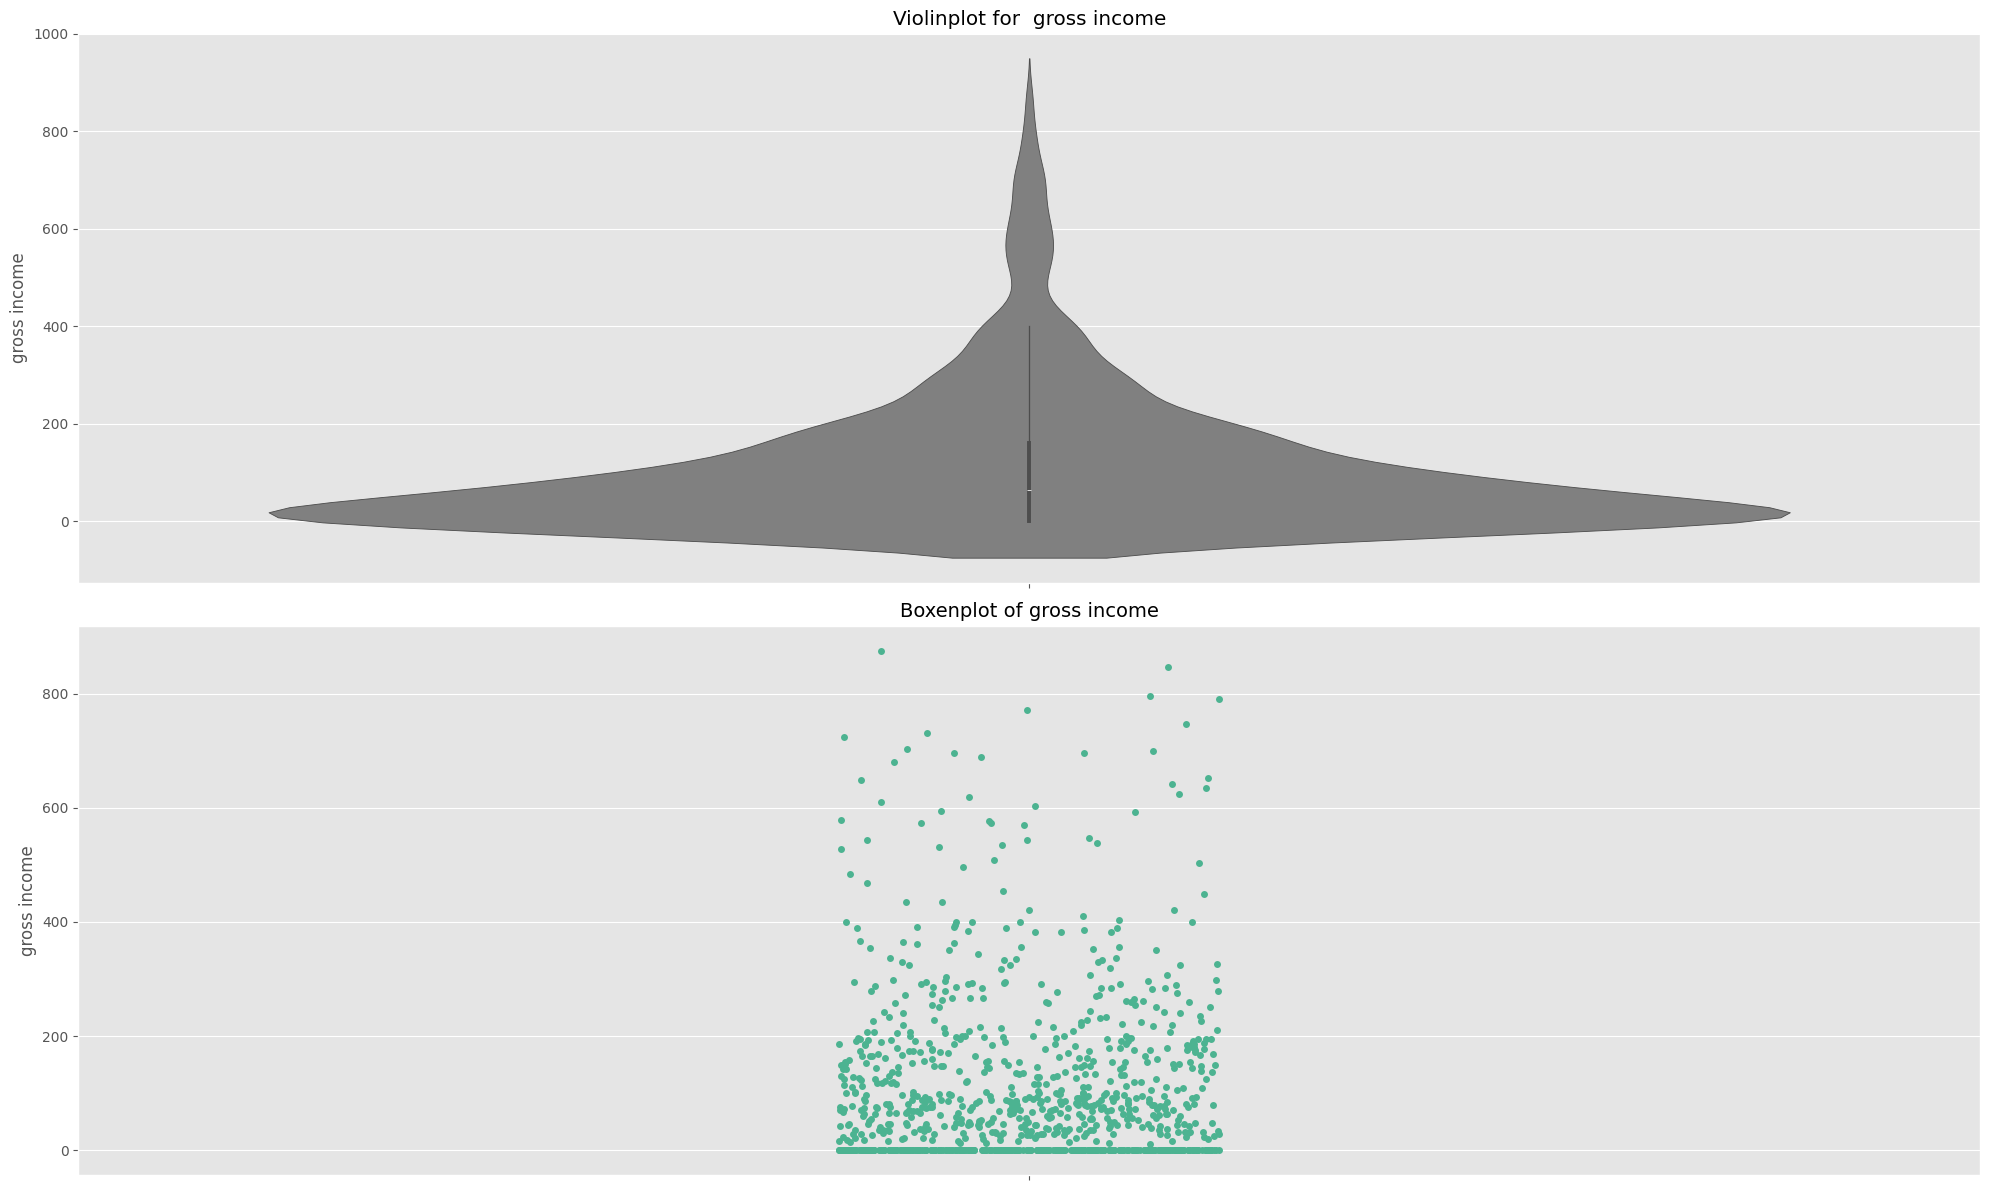

In [32]:
univariate_quant('gross income')

##### Ratings

Insights- 

* Ratings do have a similar to normal distribution with mean at around 7.5 rating.. 
* There are much lesser ratings in 3-5 range which is a good sign for the company. 


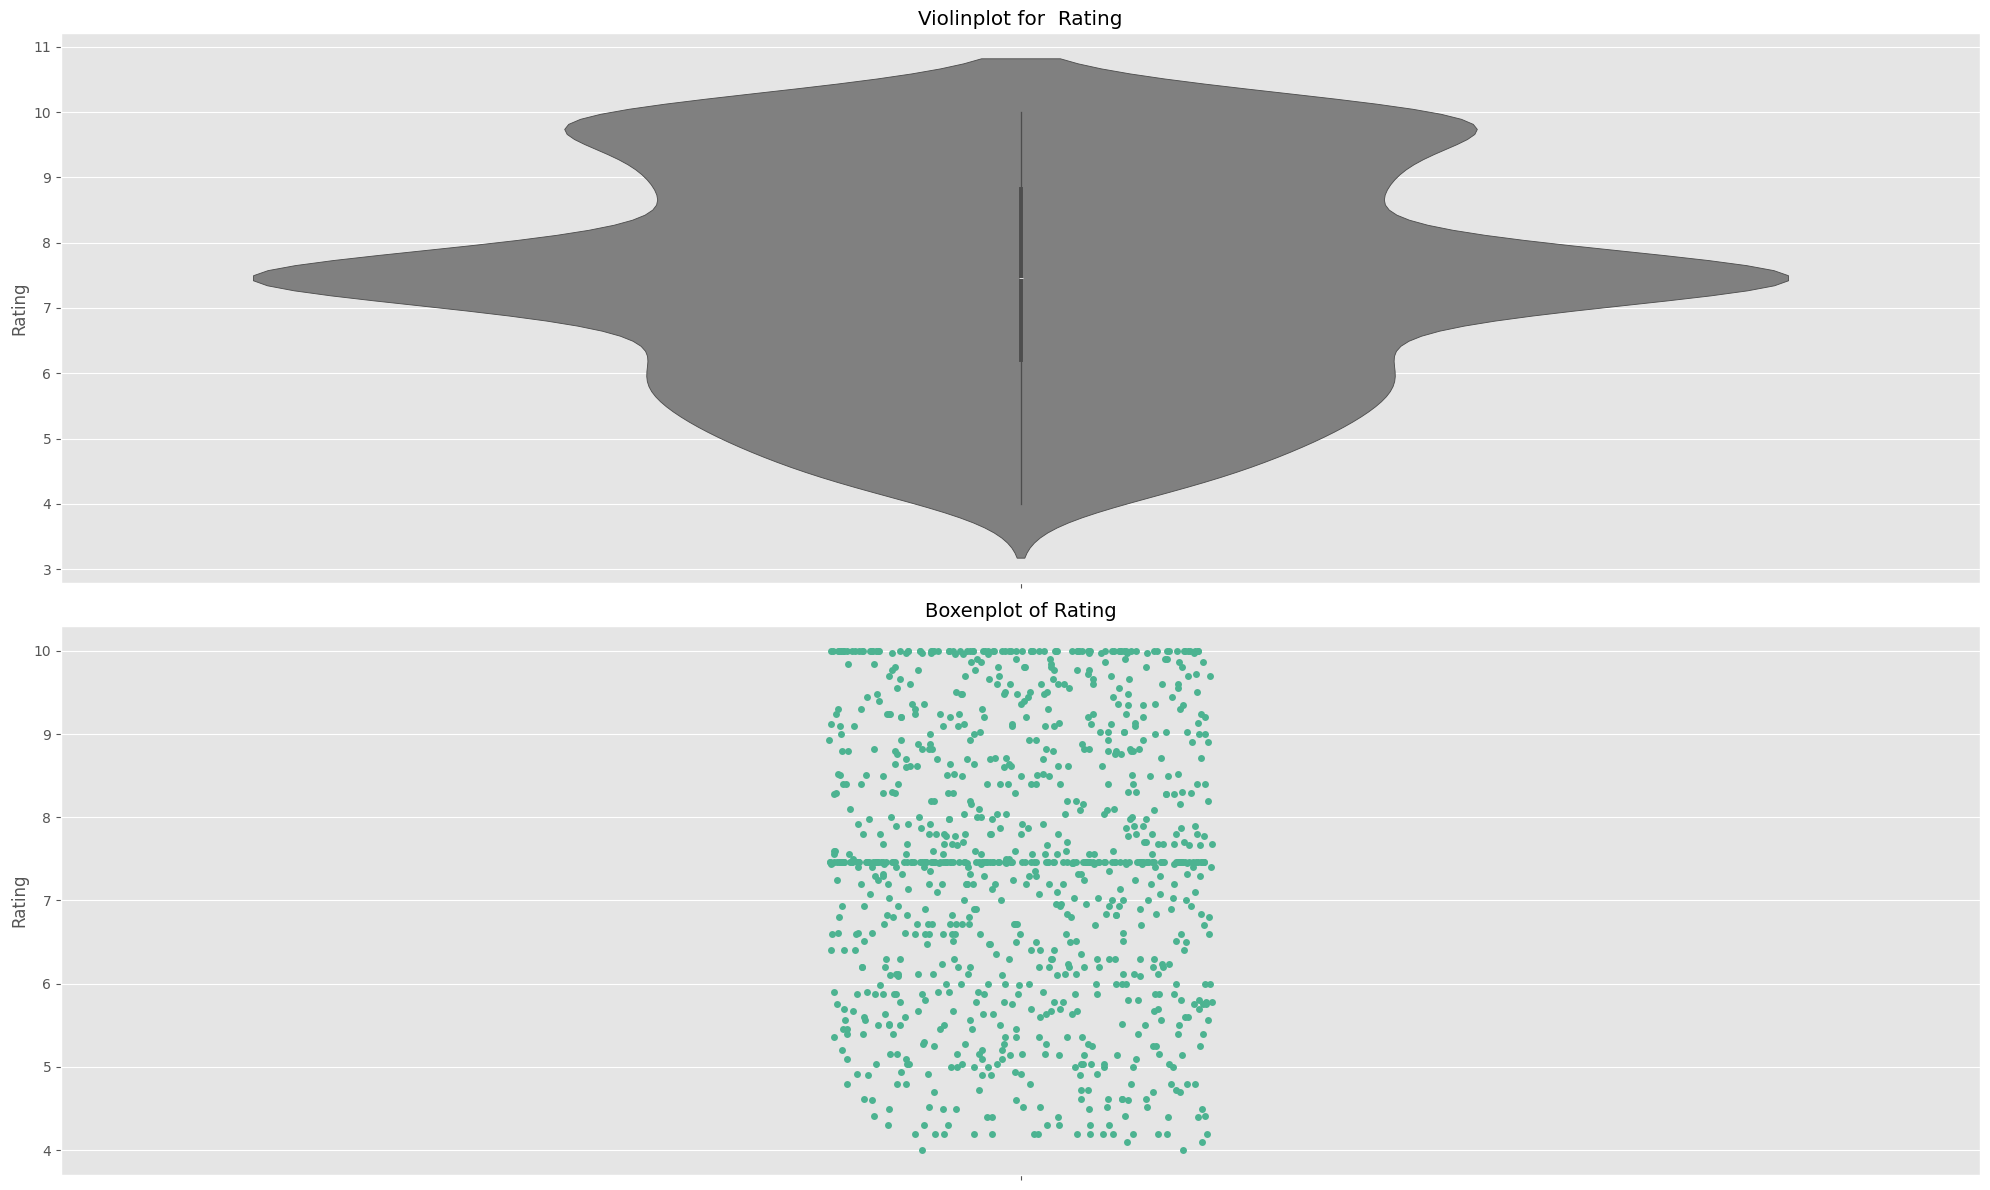

In [33]:
univariate_quant('Rating')

##### Quantity purchased

Insights- 

* The distribution is relatively a flatter one, the range 1-13 is most dense. 
* Mean and peak coincide at 7, meaning 7 is the most frequent order size. 


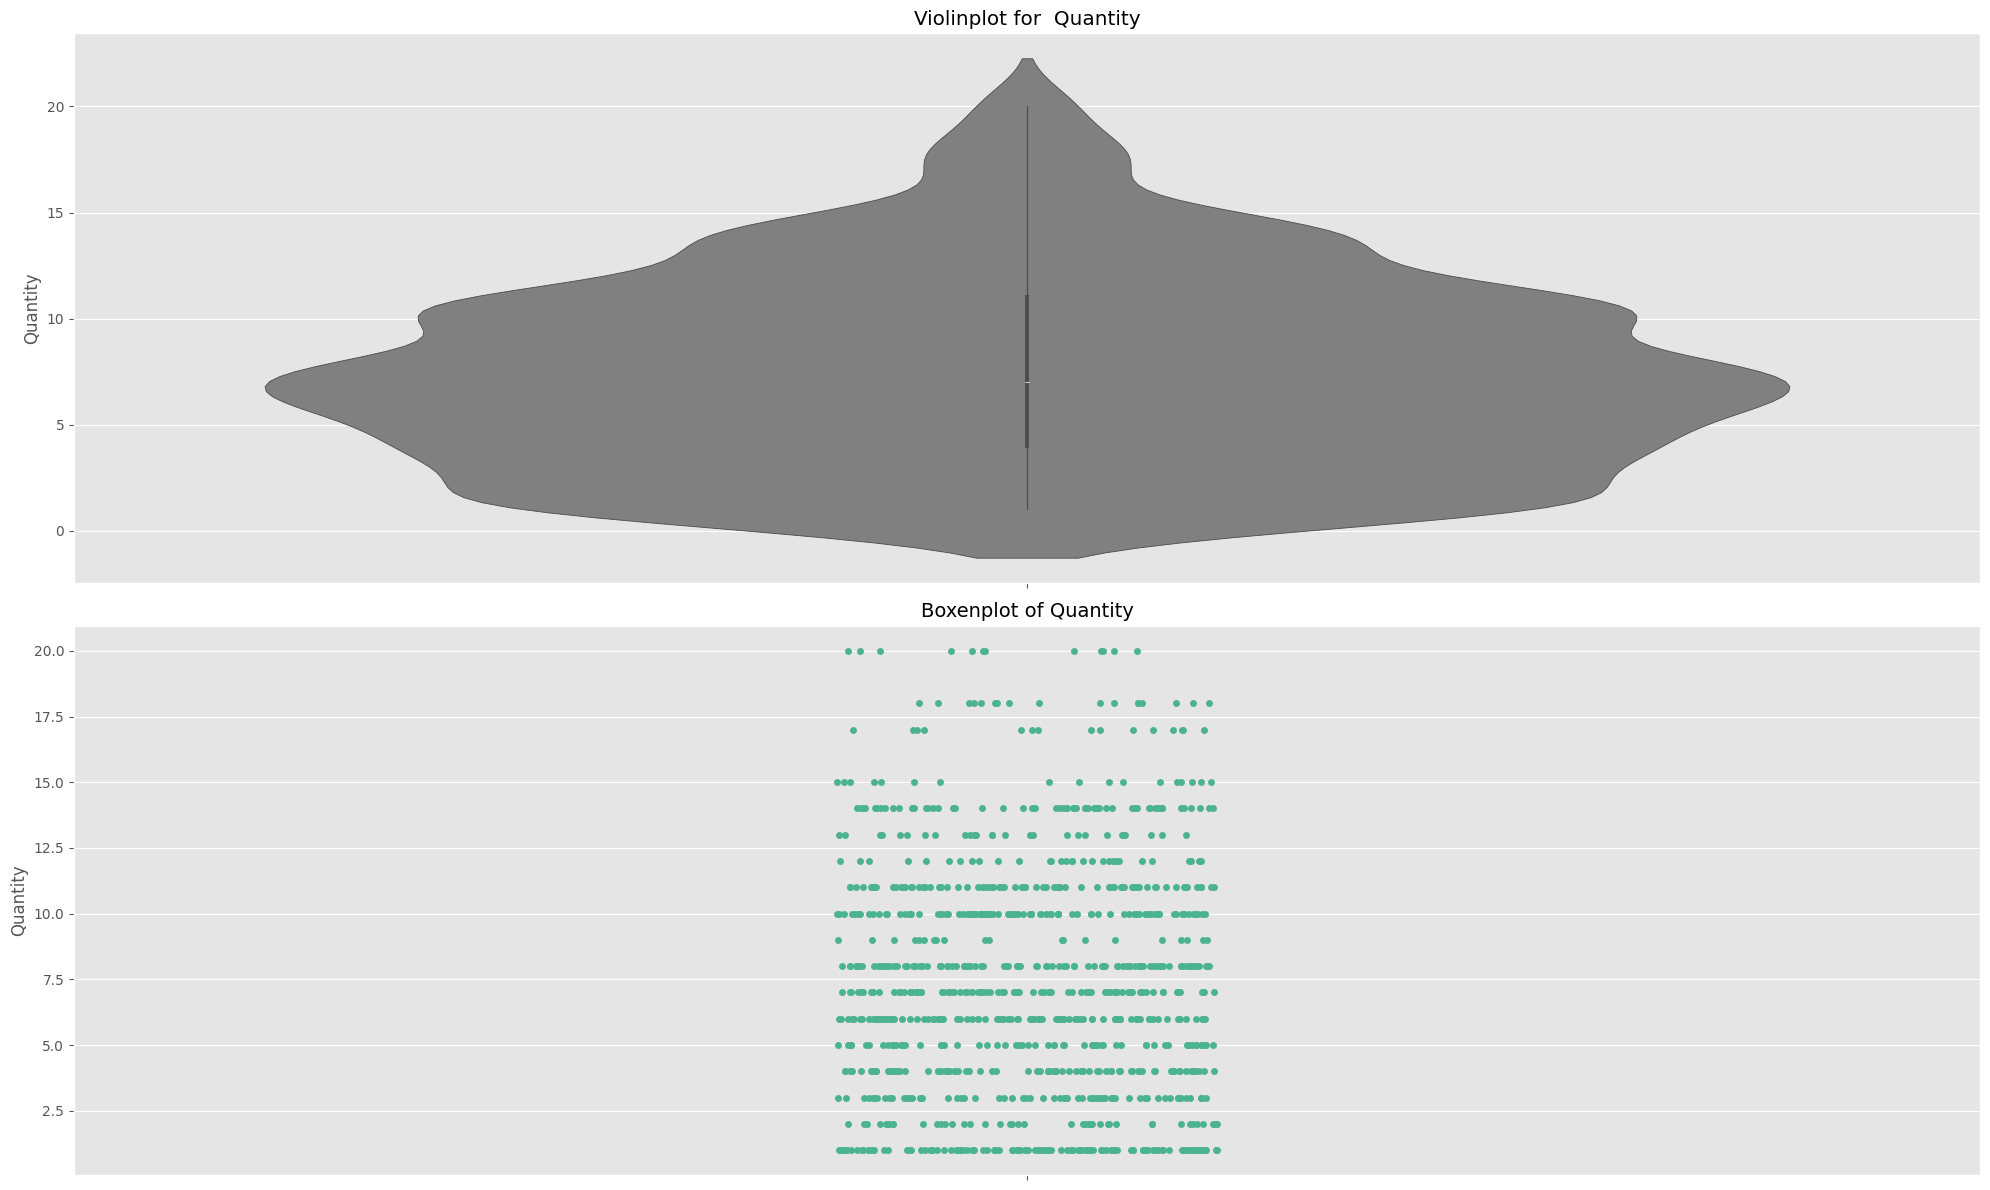

In [34]:
univariate_quant('Quantity')

##### Alternate Charts - 


For Quantitative Univariate analysis there is always a range of options to choose from - Box Plot, Histograms, Swarmplots, KDE, Distplot etc. 

## 3. Univariate Analysis ( Categorical )

The Univariate analysis of qualitative variables is fundamentally different from quantitative variables. 

While for quantitative charts, they are more statistical in nature as we have seen in last section, for categorical analysis  we  simply plot the frequencies via bar/Pie chart.

The purpose is to understand the bias in the data with respect to various categories-  

##### Across City

Insights - 

All cities have almost equal number of transactions. 
In other words, the footprint of the supermarket is similar across cities. 

<Axes: xlabel='City'>

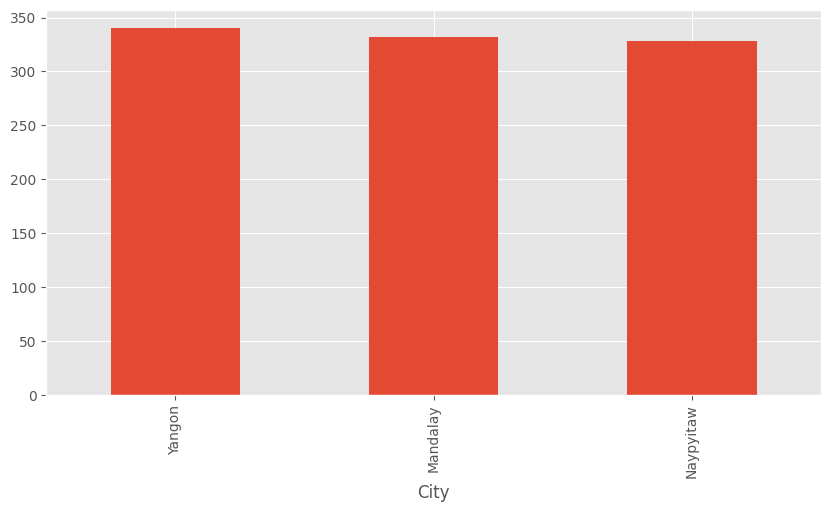

In [35]:
sales_data_2['City'].value_counts().head(10).plot.bar()

##### Across Gender

Insights - 

Females transact more as compared to males. 
There can be multiple reasons for this which can be a part of further analysis - 
* Is supermarket known for female oriented products?
* Does region in general have more females than males ?
* It might be a surprise insight for the supermarket and a particular factor might be causing it - Store aesthetics, offers on a select catalogue etc. 

<Axes: xlabel='Gender'>

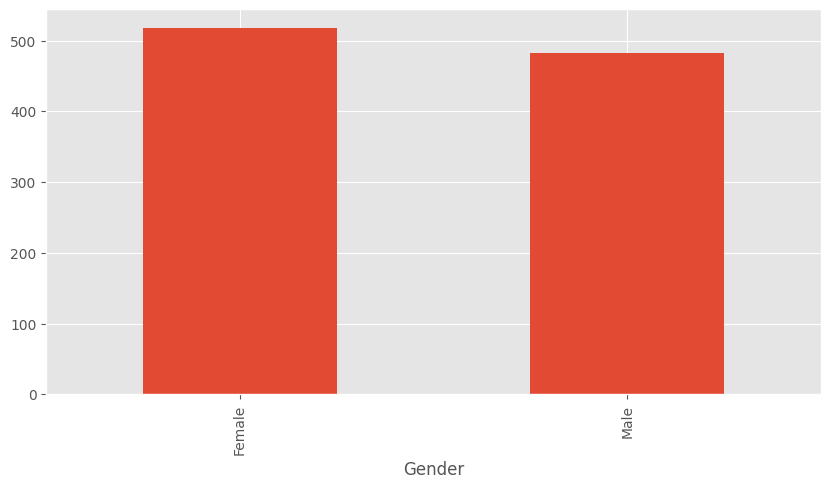

In [36]:
sales_data_2['Gender'].value_counts().head(10).plot.bar()

##### Across Product Line

Insights - 

There are 2 types of product lines because there is a huge gap in # transaction among top 3 and bottom 3 product lines. 

1. Health & Beauty , Sports , Fashion constitute majority of the transactions and are high selling product lines for the supermarket. 

2. The other 3 product lines are not selling as much. 

3. Health and Beauty is top selling product line with a healthy margin. 

The possible reasons for this might be following - 
 
 * There is differentiation on focus by supermarket - there are more products on sale from top 3 as compared to bottom 3 
 * There are special offers on top 3 which are driving the sales. 
 * The prices and quality for top 3 are more competetive than the rest. 
 * The management is more focused and concerned with the growth of top 3 rather than others ( Possibly due to low margins ) 

<Axes: xlabel='Product line'>

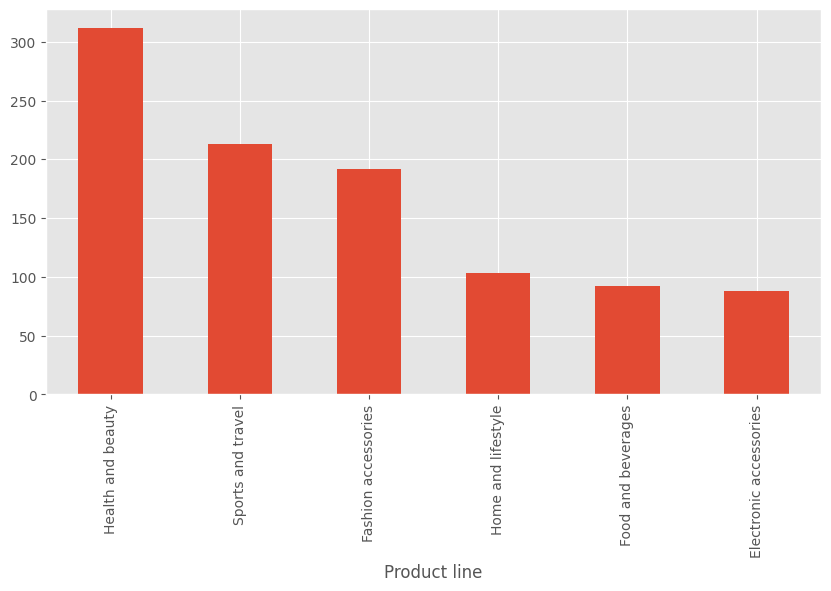

In [37]:
sales_data_2['Product line'].value_counts().head(10).plot.bar()

##### Across Payment Modes

Insights - 

* E Wallet is most prefered payment mode while Credit card is least. 


<Axes: xlabel='Payment'>

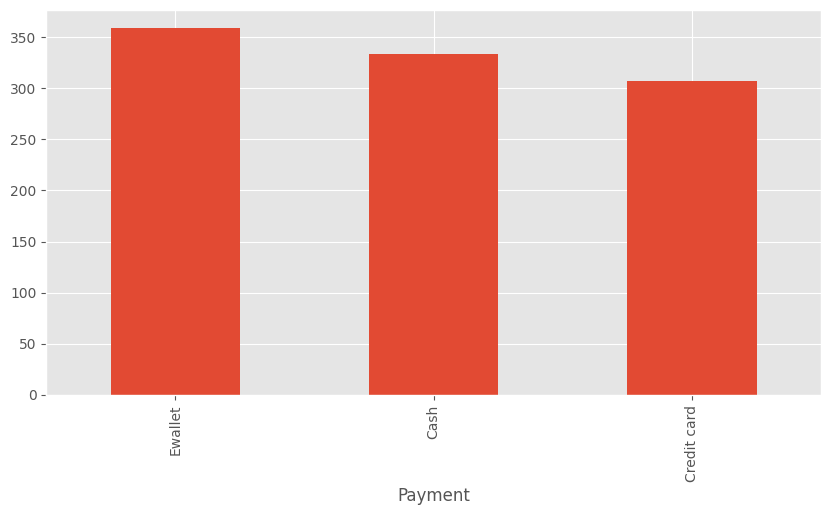

In [38]:
sales_data_2['Payment'].value_counts().head(10).plot.bar()

##### Across Customer Type

Insights - 

2/3rd of the transactions are done by Normal Members and only 1/3rd by Members

<Axes: xlabel='Customer type'>

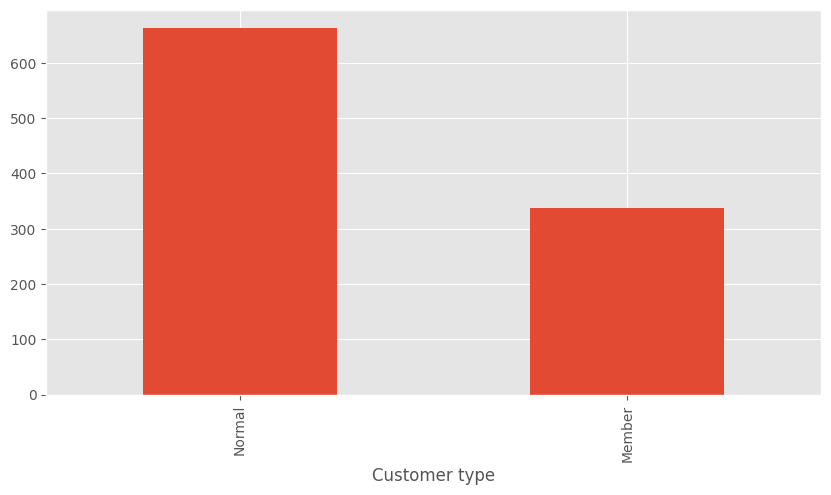

In [39]:
sales_data_2['Customer type'].value_counts().head(10).plot.bar()

##### Unique Customers who are Member/Non-Members 

While we have already looked at the number of transactions, it is also worthwhile to look at the number of Member/Normal customers that the Supermarket has.

There is a subtle difference between number of transactions and number of customers, which is to be noted. 


The count of distinct Member/Non Member customers can be obtained by grouping the data by Customer Type and then using nunique() function - 

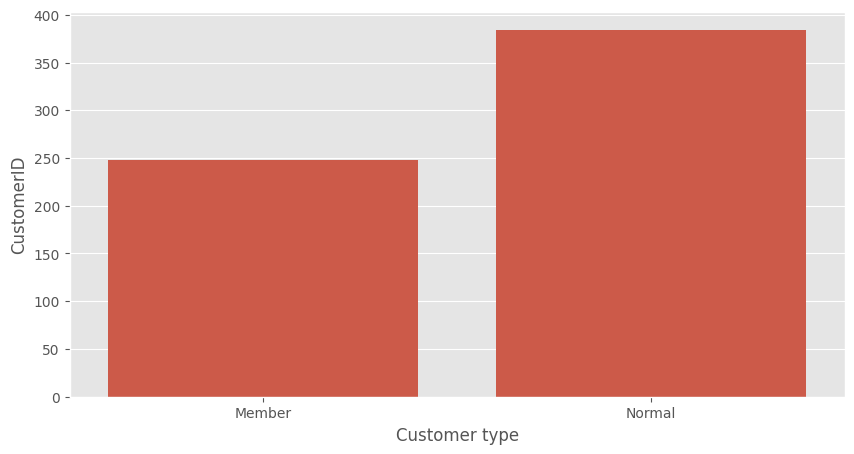

In [40]:
customer_members = sales_data_2[['CustomerID','Customer type']].groupby(['Customer type'], as_index = False).nunique()
_=sns.barplot(x=customer_members["Customer type"], y='CustomerID',data=customer_members) 

Insights - 

There are about 250 Members and 375 Normal customers with the Supermarket. 

It can be seen that the ratio of Members is more than the Transactions done by Members. 

It is essentially telling us that Members are not contibuting to more transactions as would be expected from those. 

##### Alternate Charts - 

Some other ways to look at categorical distributions are - Pie Chart, Countplot, Donut Chart etc. 

###  Stores Location on map

Folium is one of the libraries which provides us with the ability of plotting Geological charts. 

We will use the same here to understand on the map where exactly the 3 stores are located and how is the proximity like. 

First, we'll need to create a dataframe with all the cities, along with their coordinates. 

Drop_duplicates can be used here to get the unique rows - 

In [41]:
Cities_geo= sales_data_2[['City','Longitude','Latitude']].drop_duplicates()
Cities_geo

,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


In the next step, the map can be plotted using folium.map(). The parameters are passed accordingly. ( Use Shift + tab for more details)

folium.Map() just plots the chart. We also need to put city markers on the map. This done by putting markers one by one using folium.marker() function - 

In [42]:
geo_map = folium.Map(location =[16.8409,96.1735], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

for (i, j) in Cities_geo.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['City'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(geo_map)

geo_map


Insights - 

The cities are distributed across lengths of Myanmar and are not close to each other. 

Yangon is the only coastal city where the chain is present, other ones are located in the middle of Myanmar. 

Company can expand in North and East of Myanmar as there is no presence in those areas. 

Also, a big coastal city Sittwe is also an option for later expansion. 



## 4. Bivariate Analysis

It is one of the simplest form of statistical analysis where 2 variables are involved. It looks for relationship among the 2 variables. The applications involve hypothesis validation of association among variables, finding trends, regression etc.

### Heatmap

The purpose of Heatmap here is to look for any significant correlations among continuous variables in our data. 

Since majority of the quantitative variables in this sales data are mathematically related to each other, the use of Heatmap in this case is not of much help. 

For example following related variables - 
* Invoice amount = Unit Price * Quantity
* COGS = Invoice Amount * 0.0476
* Gross Income = Invoice Amount - COGS


In [43]:
sales_data_2.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,month,day,weekday,hour,minute
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.1735,16.8409,2,21,Thursday,13,8
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.0785,19.7633,5,27,Monday,10,29
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.1735,16.8409,12,27,Friday,13,23
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.1735,16.8409,11,15,Friday,20,33
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.1735,16.8409,3,31,Sunday,10,37


In [44]:
sales_data_2.dtypes

Invoice ID                         object
Branch                             object
CustomerID                         object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Longitude                         float64
Latitude                          float64
month                               int32
day                                 int32
weekday                            object
hour                              

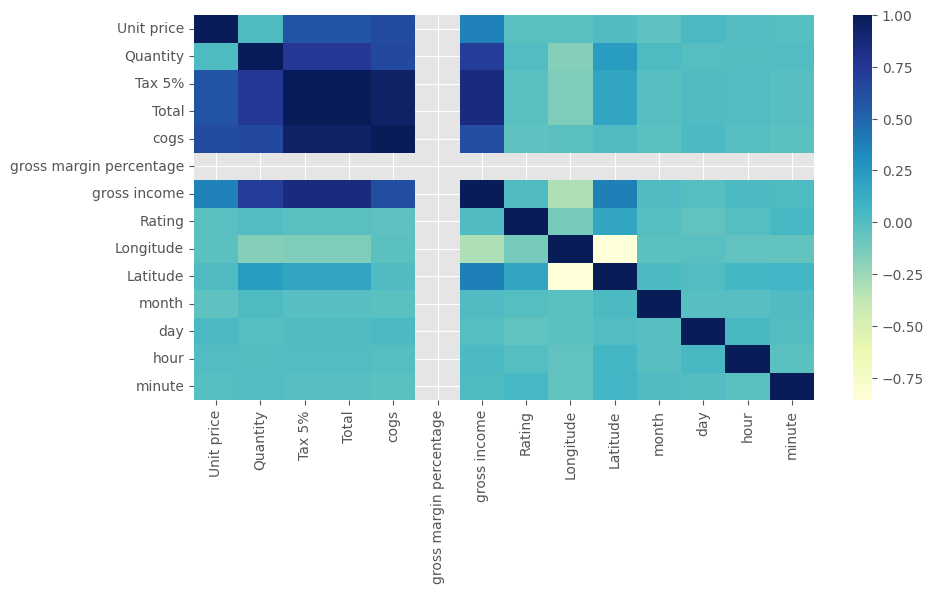

In [45]:
heatmap_data=sales_data_2.select_dtypes(include="number").corr()
_=sns.heatmap(heatmap_data, cmap='YlGnBu')

As expected, we see high correlation in almost all sales related fields because they are derived from each other.

##### Function for bivariate analysis - 

There are 4 important metrics that can provide maximum insights in this sales data - 

1. Sales 
2. AOV - Average Order Value
3. Mean Order Quantity
4. Ratings

It would be worthwhile to plot these against multiple categorical variables to see if those categories have an impact on these 4 metrics. 

It can be a great way to find out what's working for the chain and what is not. 

In [46]:
# Defining function for Univariate Analysis of Quantitative Variables

def grouped_analysis(col,hue=None):
    
    plt.figure(figsize=(20,10))
    
    def custom_fmt(x):                                                     # Custom format function to show values in pie chart
        return '{:.0f}%\n({:.0f})'.format(x, sales_grouped['Total'].sum()*x/100)  # It is used in autopct parameter in pie chart

    
    sales_grouped= sales_data_2[[col,'Total']].groupby(col).sum()                # Sales grouped by col
    mean_ratings = sales_data_2[[col,'Rating']].groupby(col).mean()              # Avg ratings grouped by col
    aov  = sales_data_2[[col,'Total']].groupby(col).mean()                       # AOV by col
    mean_units_qty = sales_data_2[[col,'Quantity']].groupby(col).mean()          # Mean order qty by col

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart title for Subplot 1
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)
   
    _=axes[0,0].pie(sales_grouped['Total'], labels = sales_grouped.index, autopct= custom_fmt,textprops={'fontsize': 14})


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    g=sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1]) 
    g.set_xticklabels(
    labels=aov.index, rotation=45)                                                # Rotating lables so that they dont overlap
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    fig.savefig("grouped_analysis"+col+".png") 

#### Across City

Insights - 

* Although the number of transactions were similar as we saw earlier in Univariate analysis, Mandalay city have significantly more sales at 39%

* Yangon sales are least at 28%

* The difference in sales is essentially driven by the differences in AOV, which is maximum for Mandalay and really low for Yangon

* Further, we can say that the higher AOV is driven by higher mean quantity as seen in the Right bottom chart

* Ratings also reflect a similar story, with highest ratings for Mandalay and least for Yangon. 

* All of above points point to a big scope of improvement in Yangon for the supermarket chain. 

In [47]:
sales_data_2.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,month,day,weekday,hour,minute
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.1735,16.8409,2,21,Thursday,13,8
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.0785,19.7633,5,27,Monday,10,29
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.1735,16.8409,12,27,Friday,13,23
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,2019-11-15,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.1735,16.8409,11,15,Friday,20,33
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,2019-03-31,10:37,Ewallet,604.170000,4.761905,0.000000,7.462625,96.1735,16.8409,3,31,Sunday,10,37


<Figure size 2000x1000 with 0 Axes>

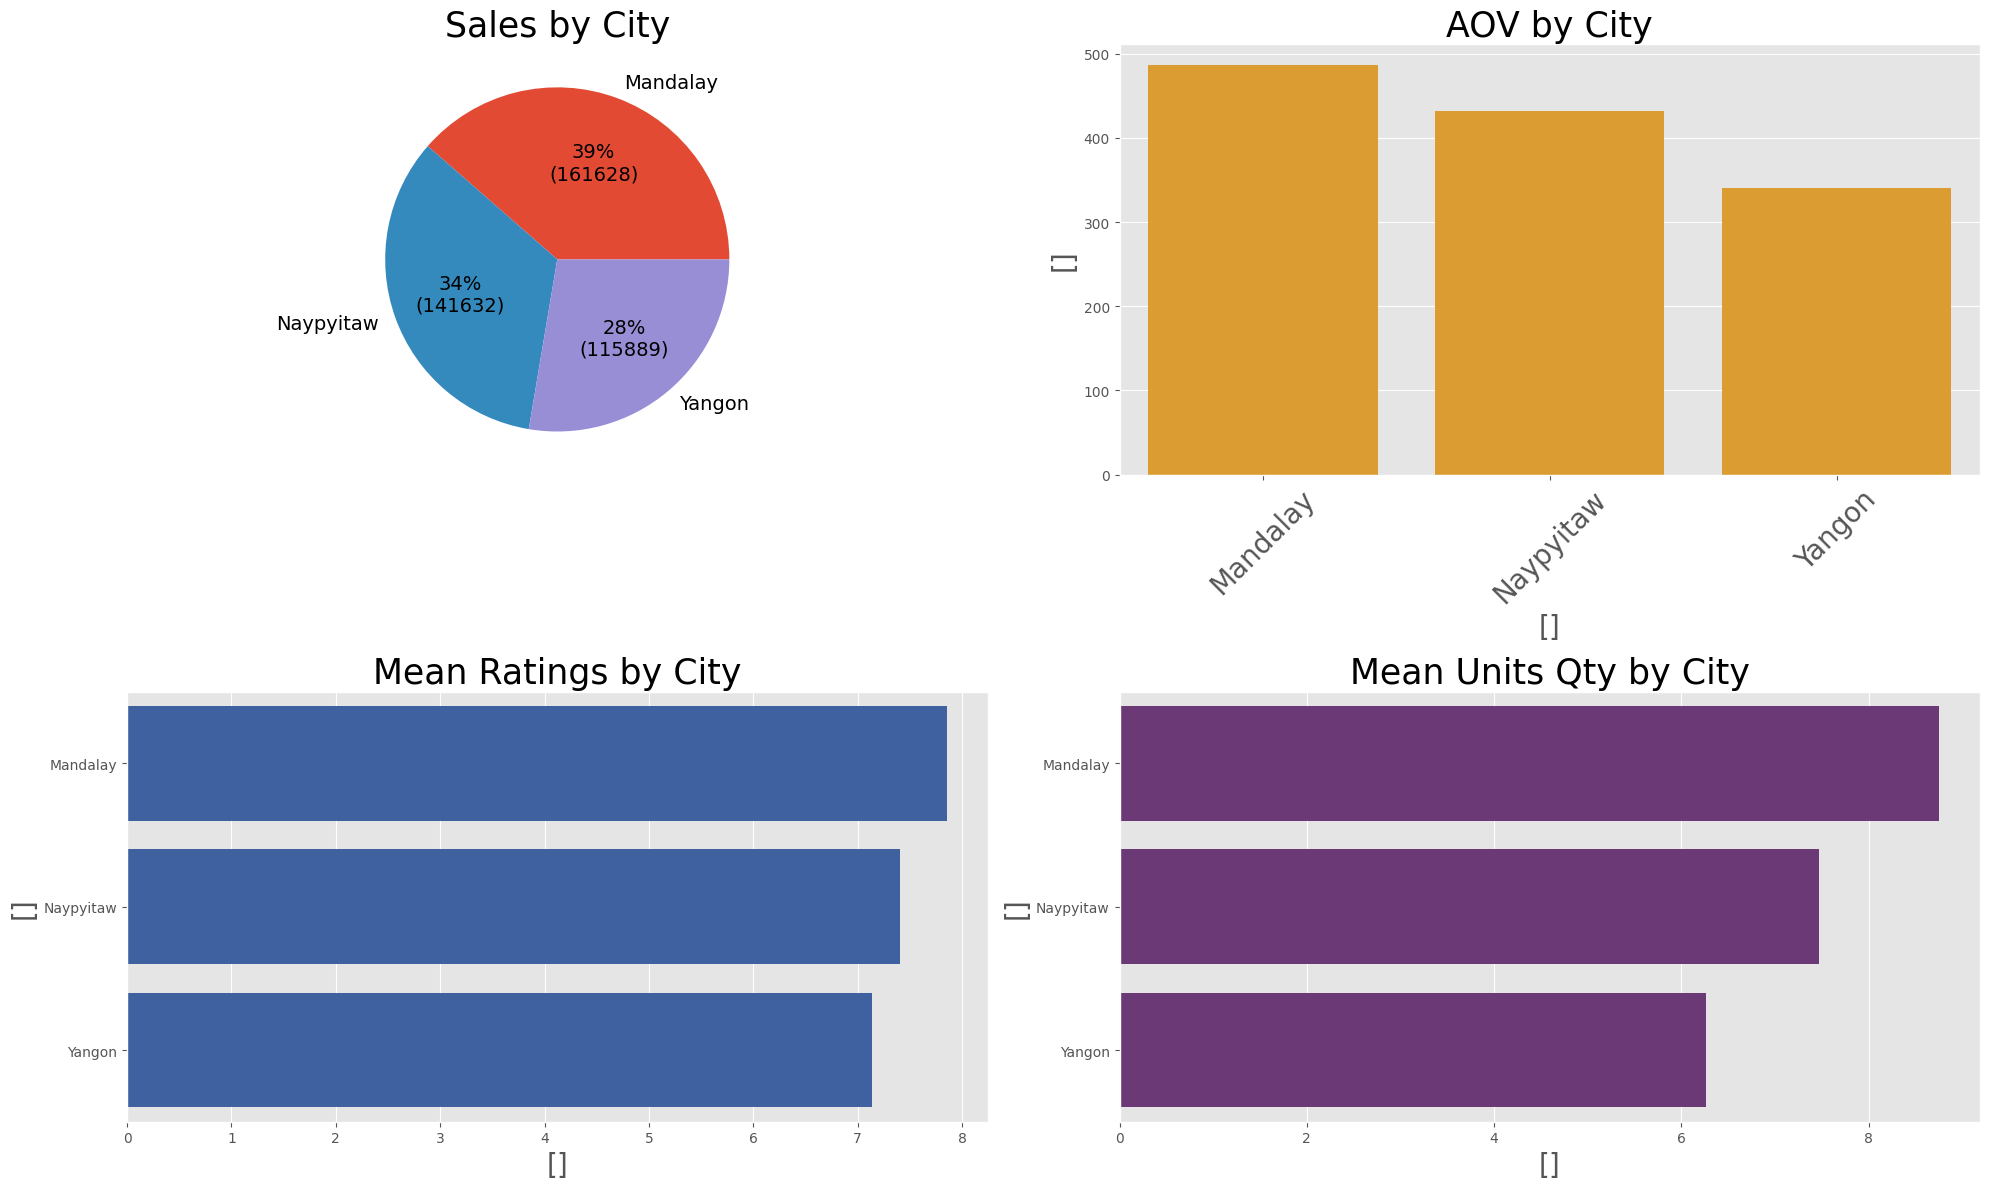

In [48]:
grouped_analysis("City")

#### Across Customer Type

Insights - 

* Members are contributing to 43% of sales, driven by really high AOV of 500 a compared to 300 of a normal customer

* The difference in AOV is driven by the difference in Average order quantity

* Ratings are similar by Member and Normal customers.



<Figure size 2000x1000 with 0 Axes>

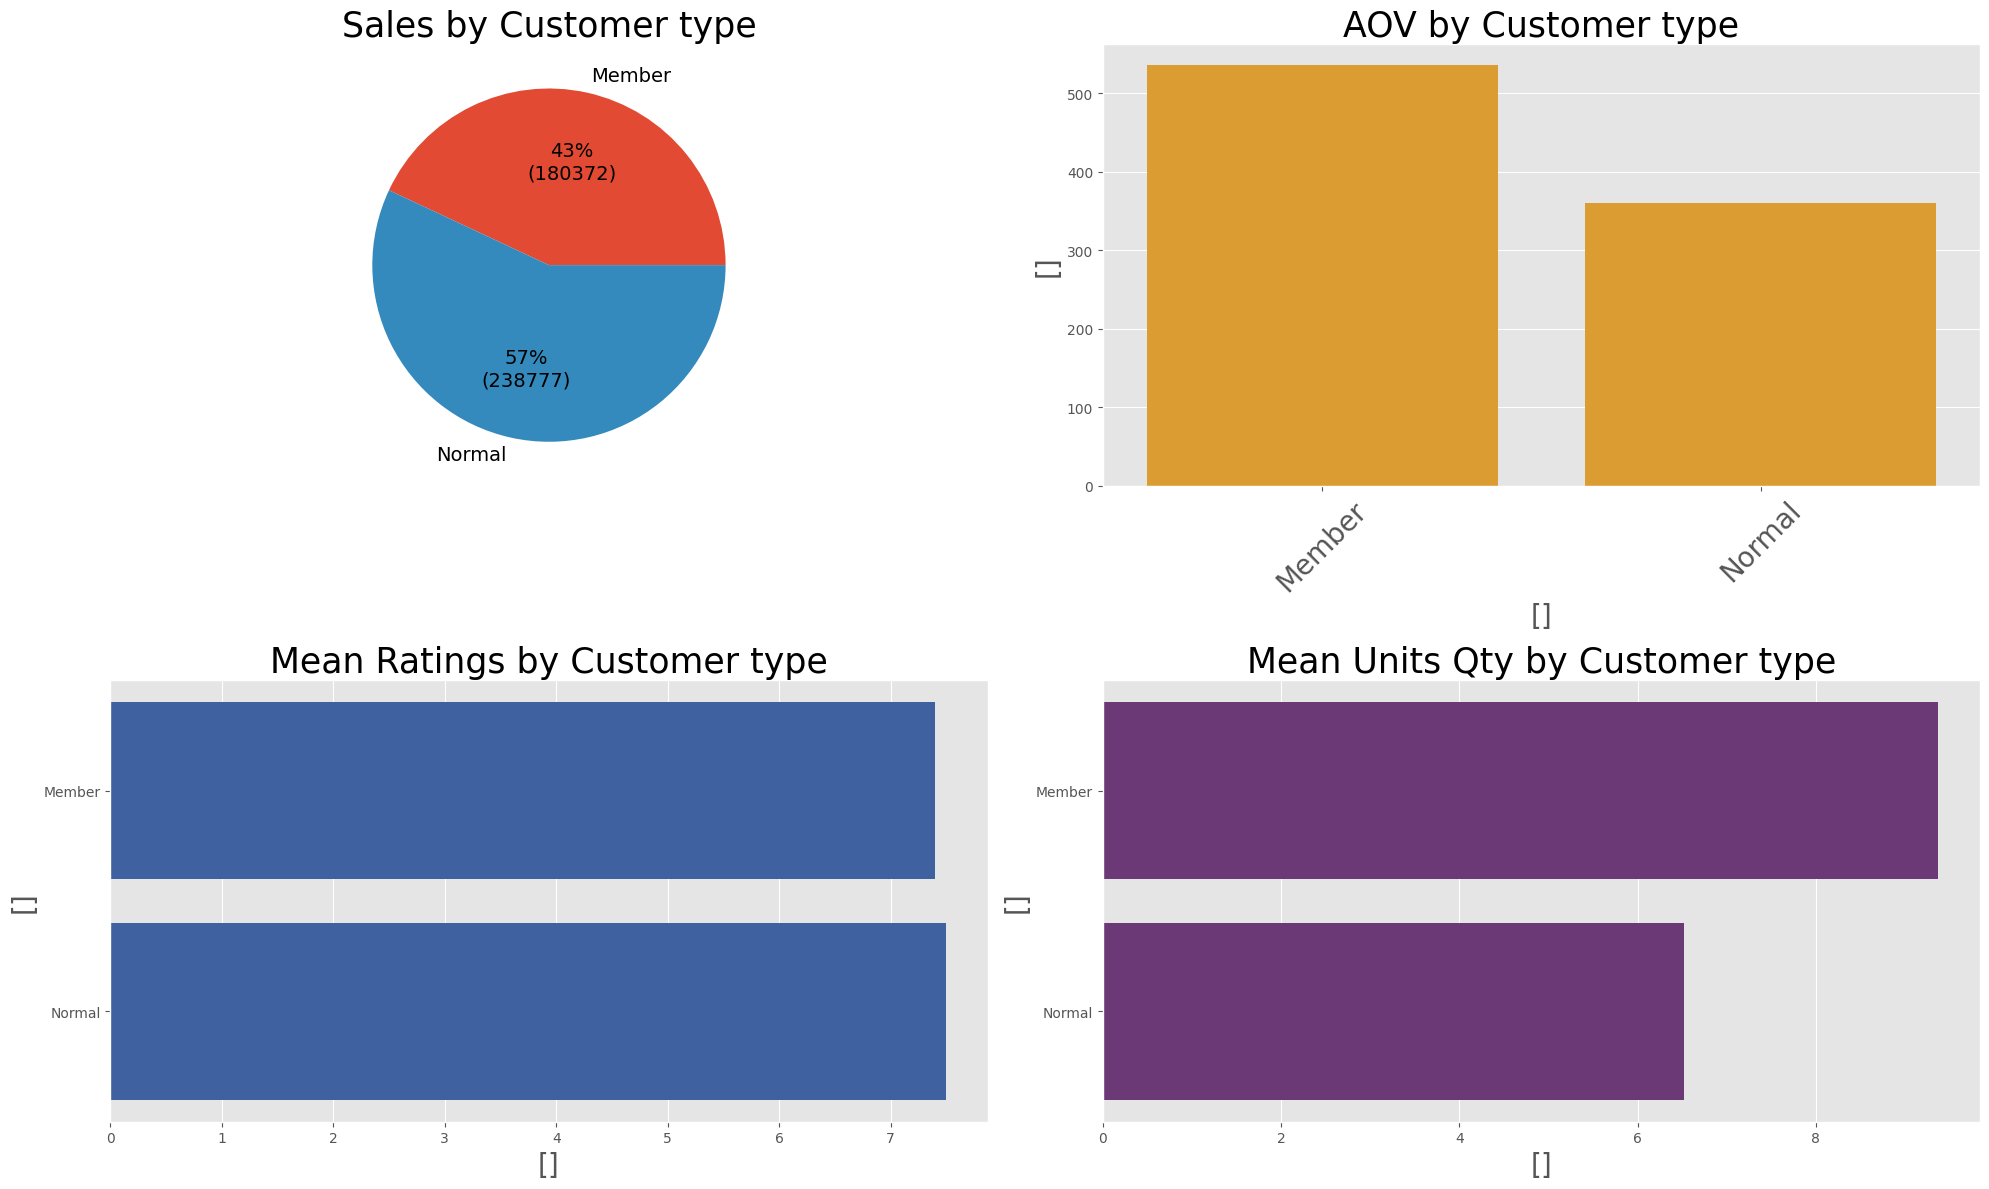

In [49]:
grouped_analysis('Customer type')

#### Across Gender

Insights - 

* As expected after Univariate analysis, females are driving more sales at 55%

* The AOV and average order quantity are also significantly higher for females

* The ratings are not impacted by Gender




<Figure size 2000x1000 with 0 Axes>

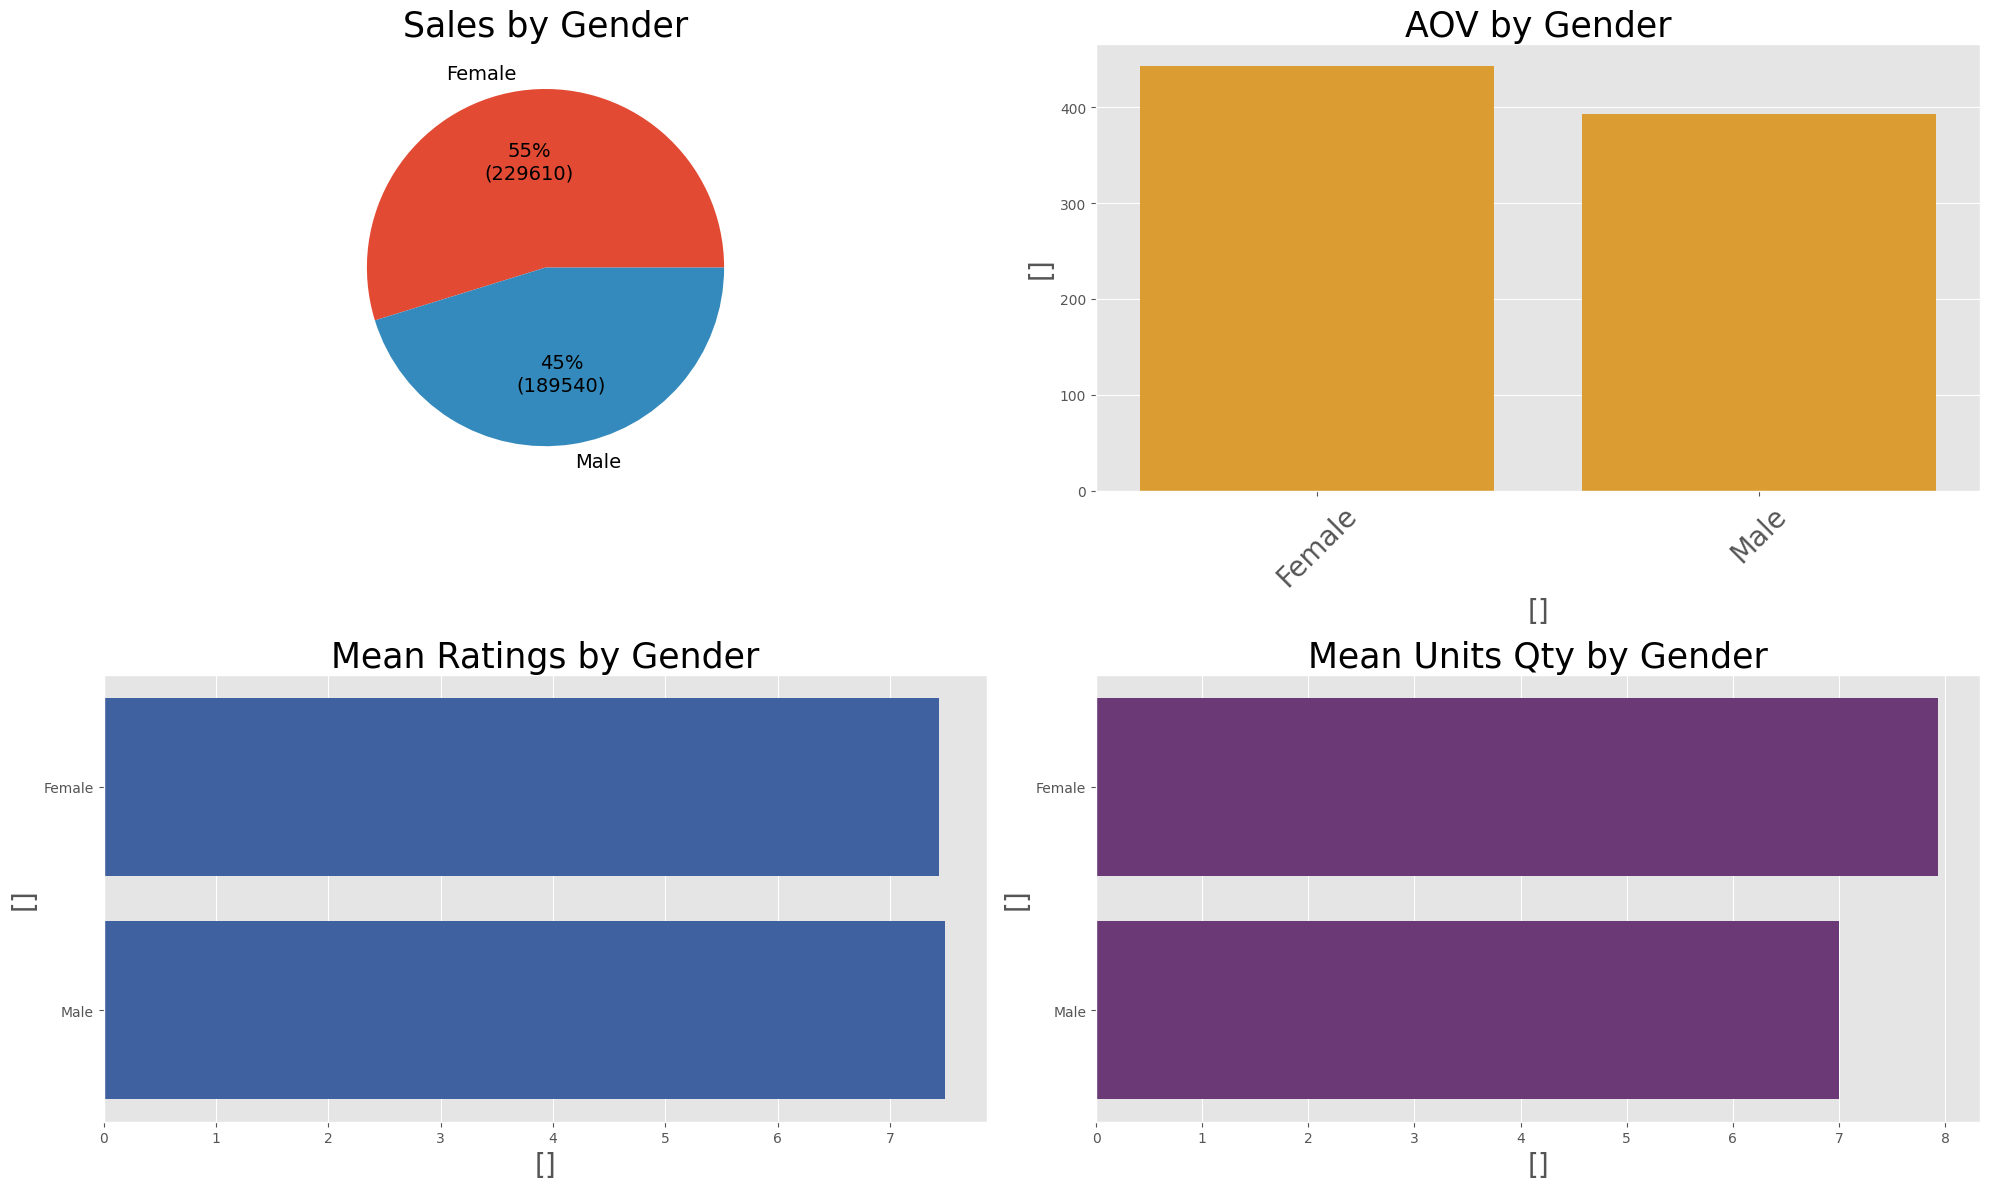

In [50]:
grouped_analysis('Gender')

#### Across Product Line

Insights - 

* Health and Beauty is the most prominent segment with 30% of sales.
* 3 bottom segments - Food & Beverages, Electronics, and Home & lifestyle together make 30% of the sales. 
* Food & Beverages have the maximum AOV among all categories, Home and lifestyle also has a relatively higher AOV. 
* Customers love these 2 segments as the ratings are also highest for these 2 segments. 
* If the company could drive more transactions in above 2 segments, it will boost the sales significantly due to their higher AOV






<Figure size 2000x1000 with 0 Axes>

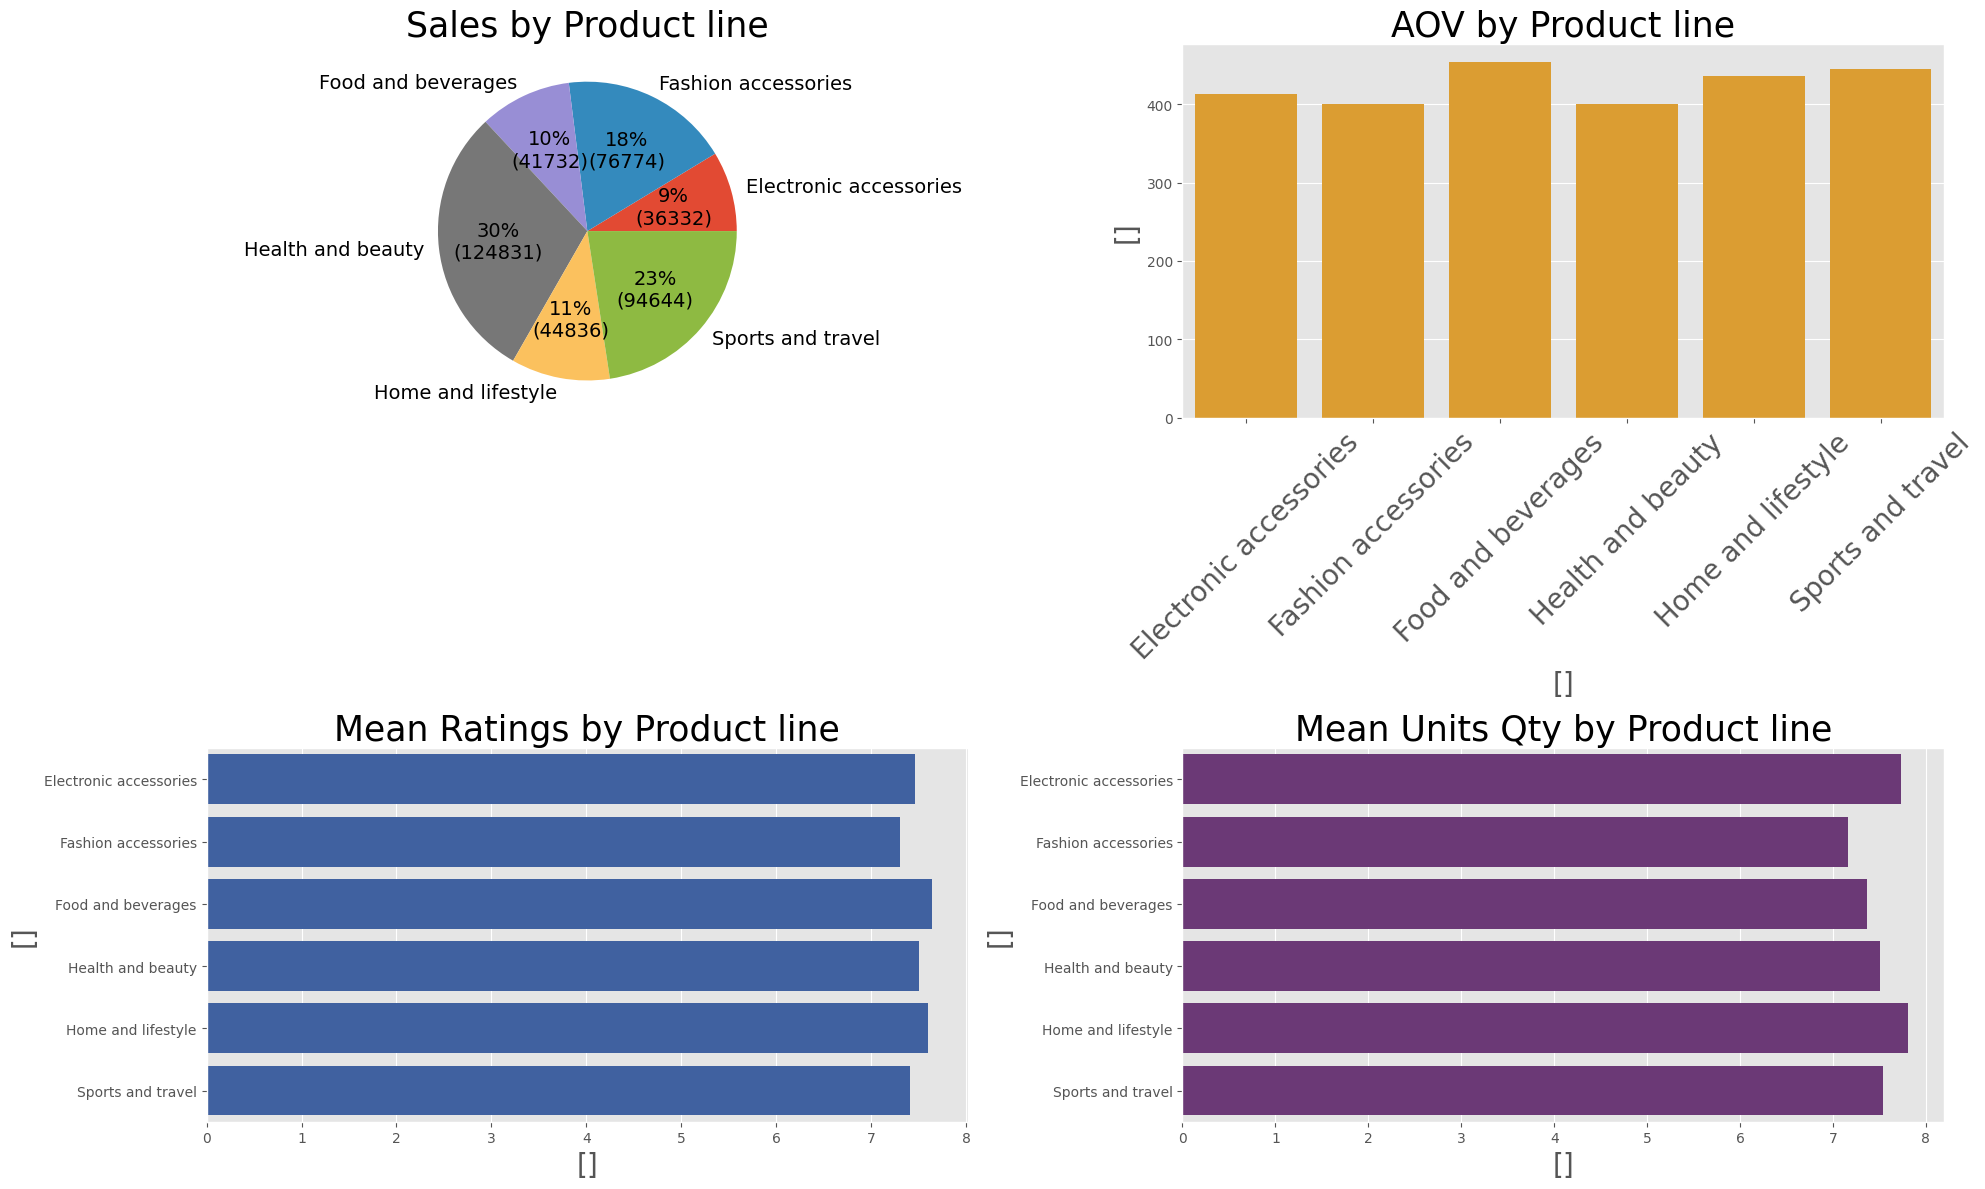

In [51]:
grouped_analysis('Product line')

#### Across Payment Modes

Insights - 

* Payment mode doesn't seem to have an impact in any metric as modes have equal distribution in sales, ratings etc. 
* AOV for Credti cards is relatively higher but the difference is not significant for it to prove a hypothesis. 




<Figure size 2000x1000 with 0 Axes>

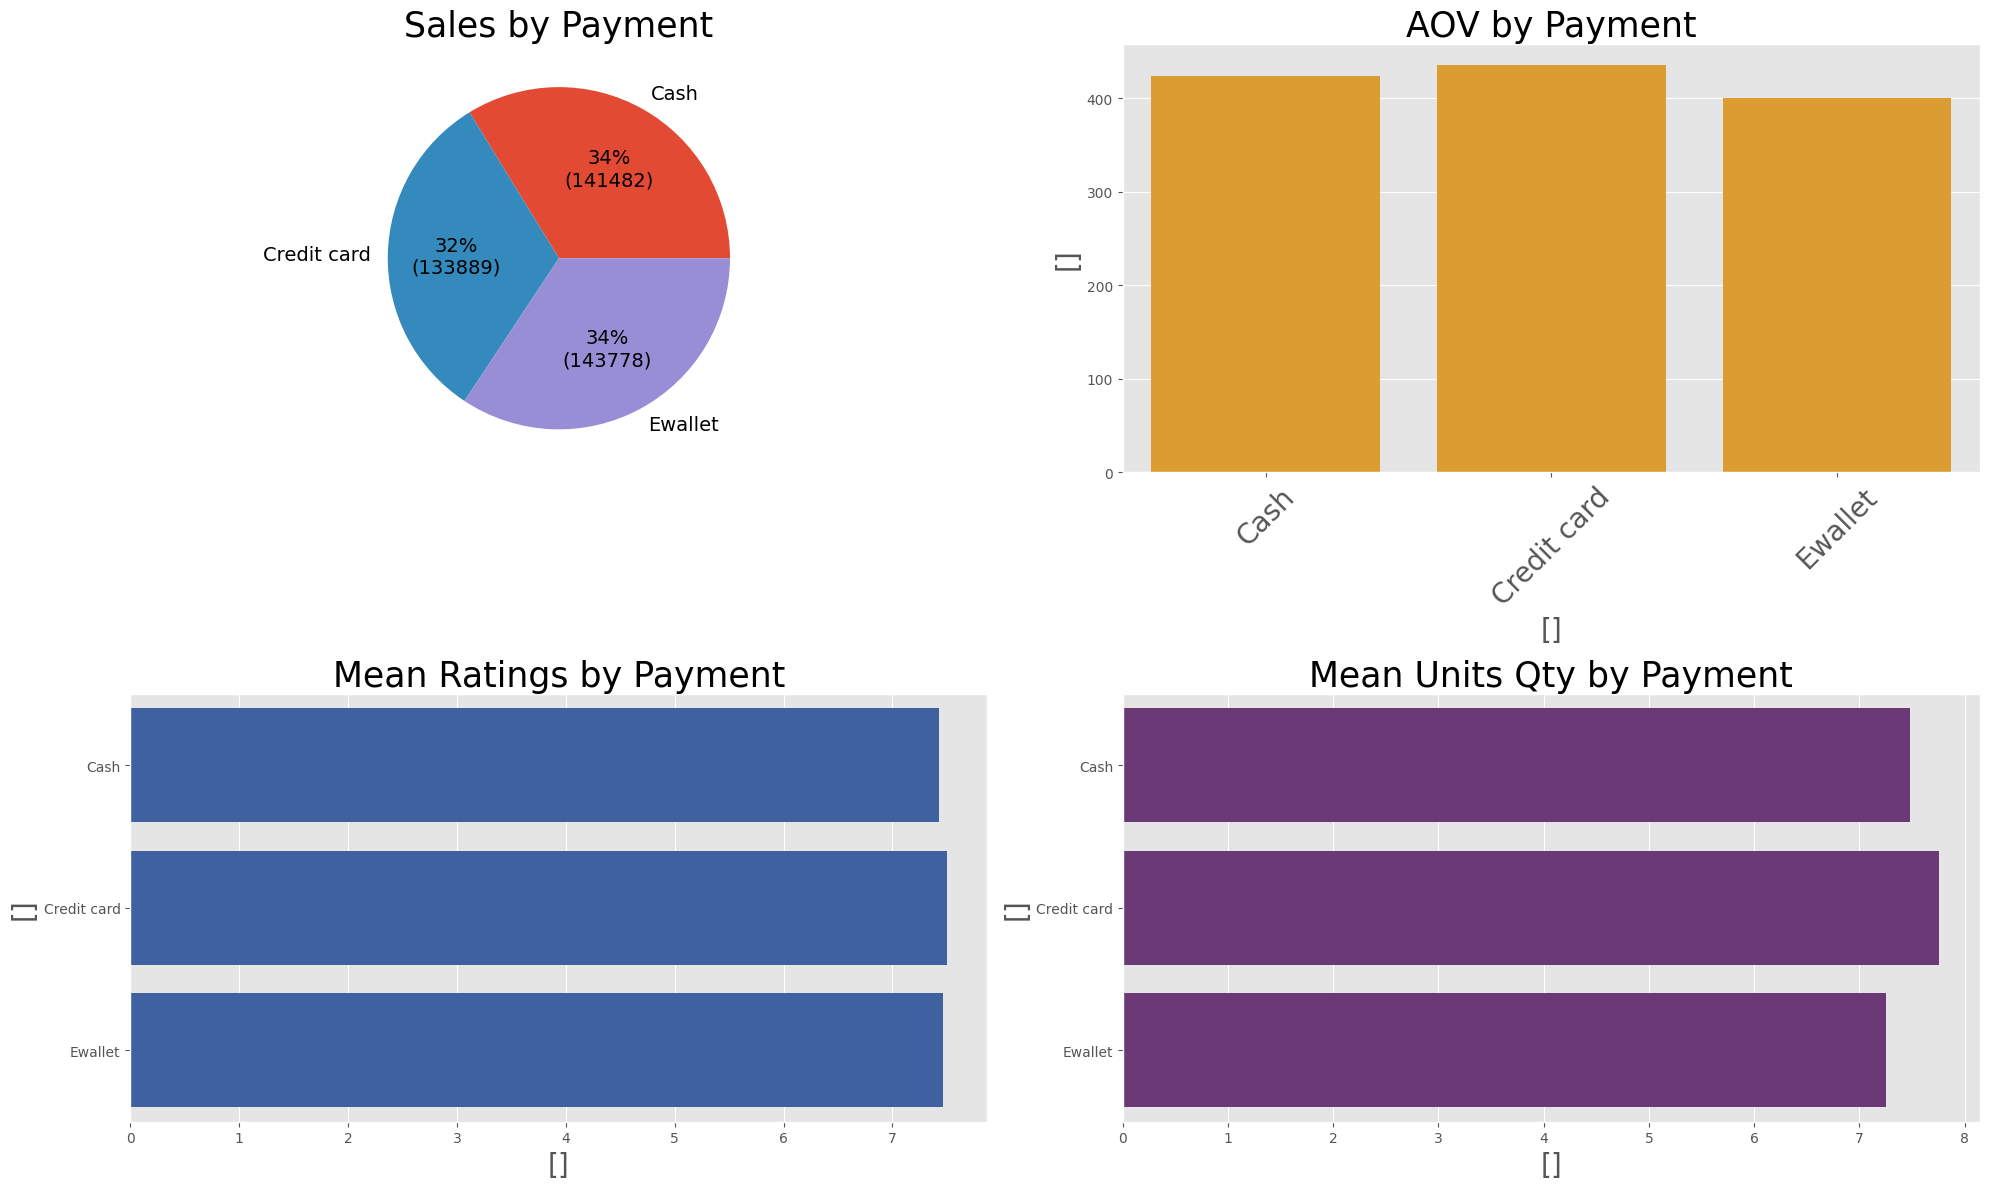

In [52]:
grouped_analysis('Payment')

### Timeseries Analysis

Timeseries analysis is when a particular metric (sales/aov etc) is analysed with respect to a time variable ( day/month/year etc)

Although timeseries analysis is always beneficial wherever applicable, but in case of Sales related data it becomes even more valuable. 
This can be attributed to following reasons - 

* Cyclicity in sales can be visualised
* Seasonal sales patterns can be identified
* Impact of various events ( Festivals, Market collapse, Natural disasters etc. ) can be identified
* New strategies can be devised based on the insights to lift up sales during specific times. 
* Ideal promotional times can be identified. 

Here, we will be plotting the same 4 metrics as in last sections against a time variable for our analysis - 

In [53]:
# Defining function for Univariate Analysis of Quantitative Variables

def timeseries_analysis(col,hue=None):
    
    plt.figure(figsize=(20,10))
    
    sales_grouped= sales_data_2[[col,'Total']].groupby(col).sum()              # Sales grouped by col
    mean_ratings = sales_data_2[[col,'Rating']].groupby(col).mean()            # Avg ratings grouped by col
    aov  = sales_data_2[[col,'Total']].groupby(col).mean()                      # AOV by col
    mean_units_qty = sales_data_2[[col,'Quantity']].groupby(col).mean()         # Mean order qty by col


    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
     
    
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart titl for Subplot 1
    sns.lineplot(x=sales_grouped.index , y= sales_grouped['Total'], data=sales_grouped, ax=axes[0,0])


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,1].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,1].get_yticklabels(),fontsize=20)
    sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1])    
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[1,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[1,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[1,1].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[1,1].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    fig.savefig("timeseries_analysis"+col+".png") 

##### Timeseries Analysus - by Hour

Insights - 

* Sales peak sharply at 7PM in the evening 
* 4PM-6PM is a dead period with really low sales
* Stores see moderate sales during 10 AM to 3 PM
* Ratings, Order quantity logically should not be related to time of the day, hence any variation should be attributed to a random phenomenon. 

<Figure size 2000x1000 with 0 Axes>

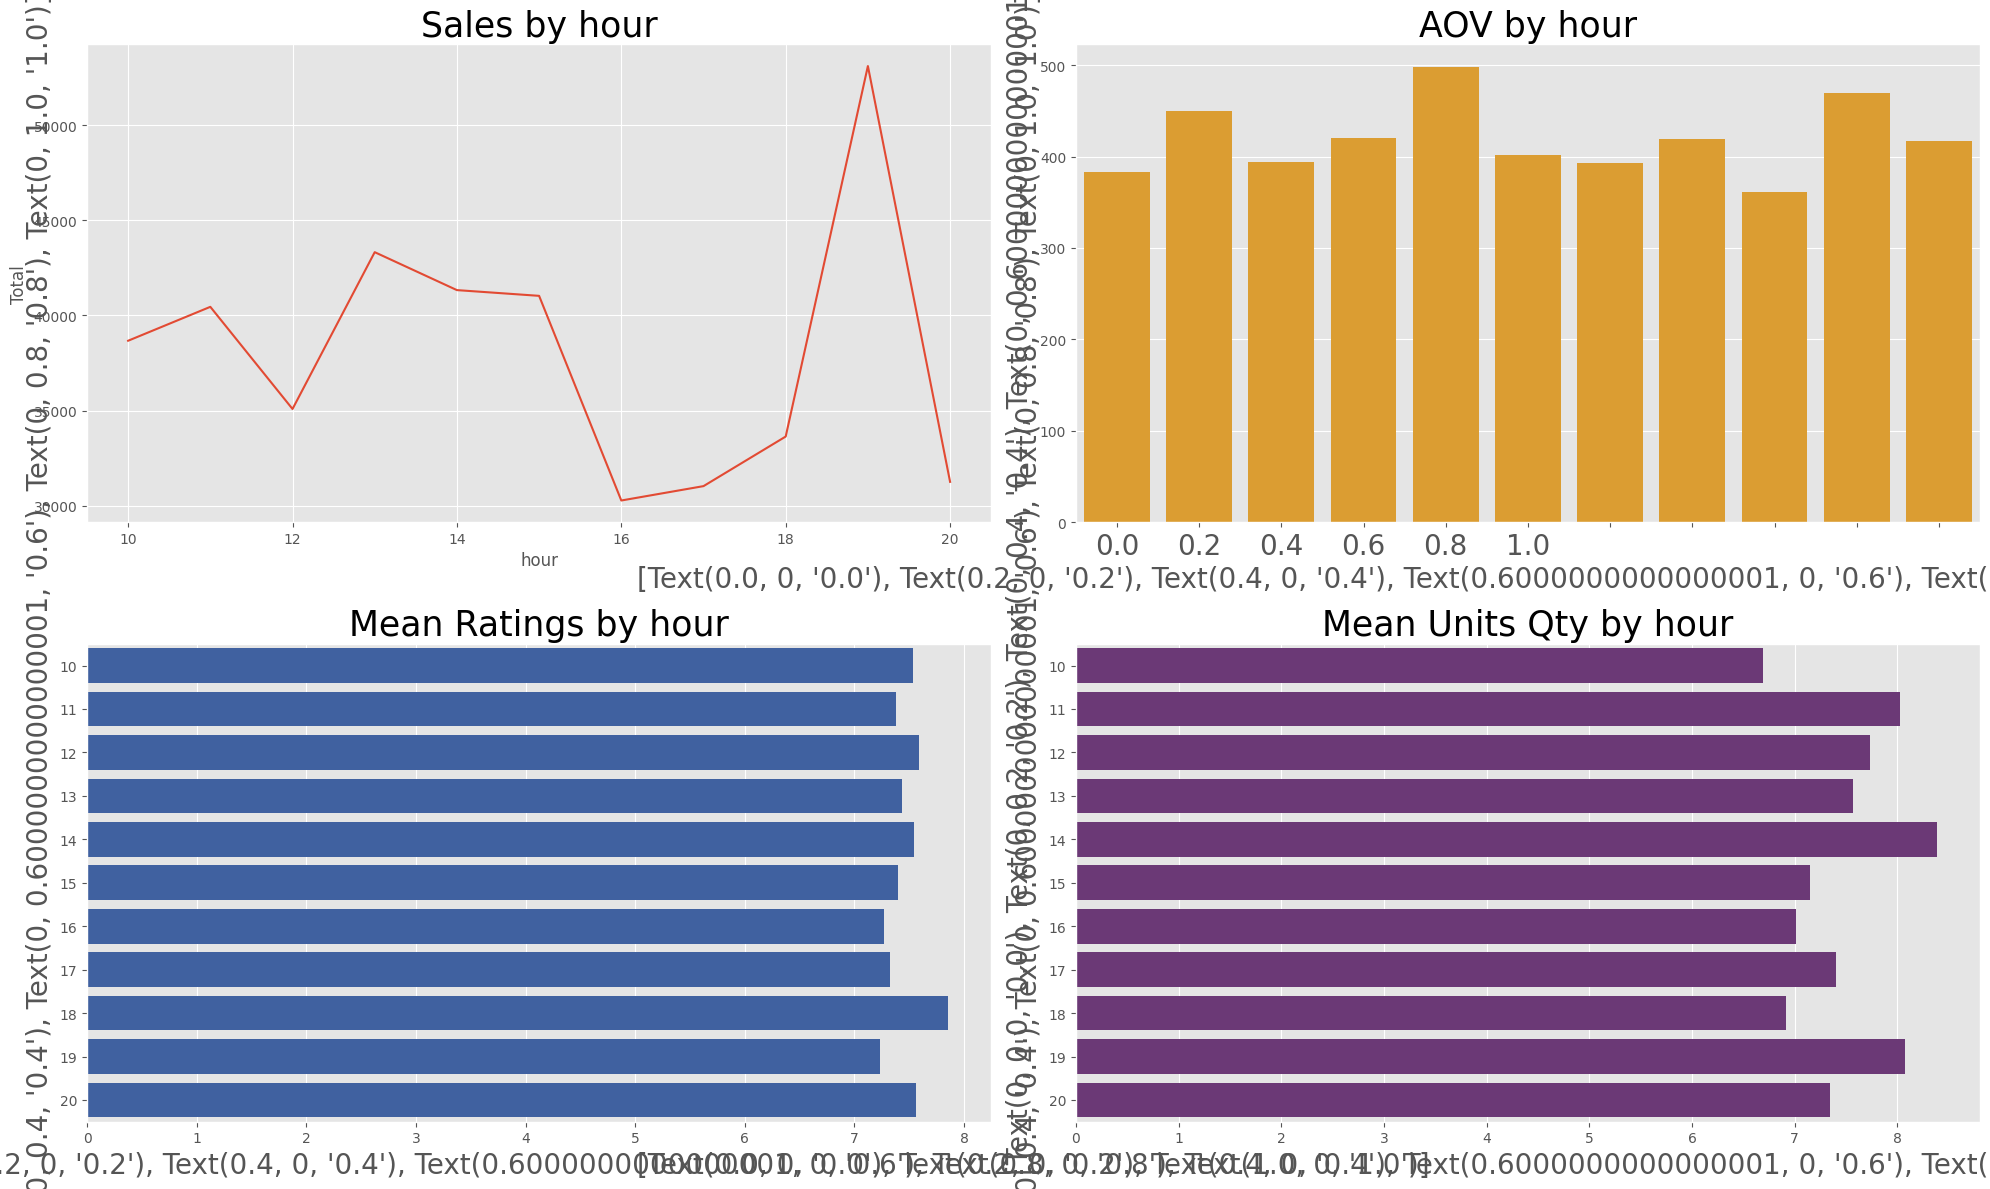

In [54]:
timeseries_analysis('hour')

##### Timeseries Analysis - by Month

Insights - 

* February is peak sales month where sales go beyond 50k+. Jut for comparison, most of the other month accumulate less than 35k revenue.  
* There must be a reason for this spike in February. It can either be a festival in the region, or a season that's driving sales of particular segment or a promotional campaign that has worked well. 
* December also sees a significant spike, although not as steep as February but still significant. 
* April-Nov sales are on the lower side, with sales dipping close to 25k in July. 

<Figure size 2000x1000 with 0 Axes>

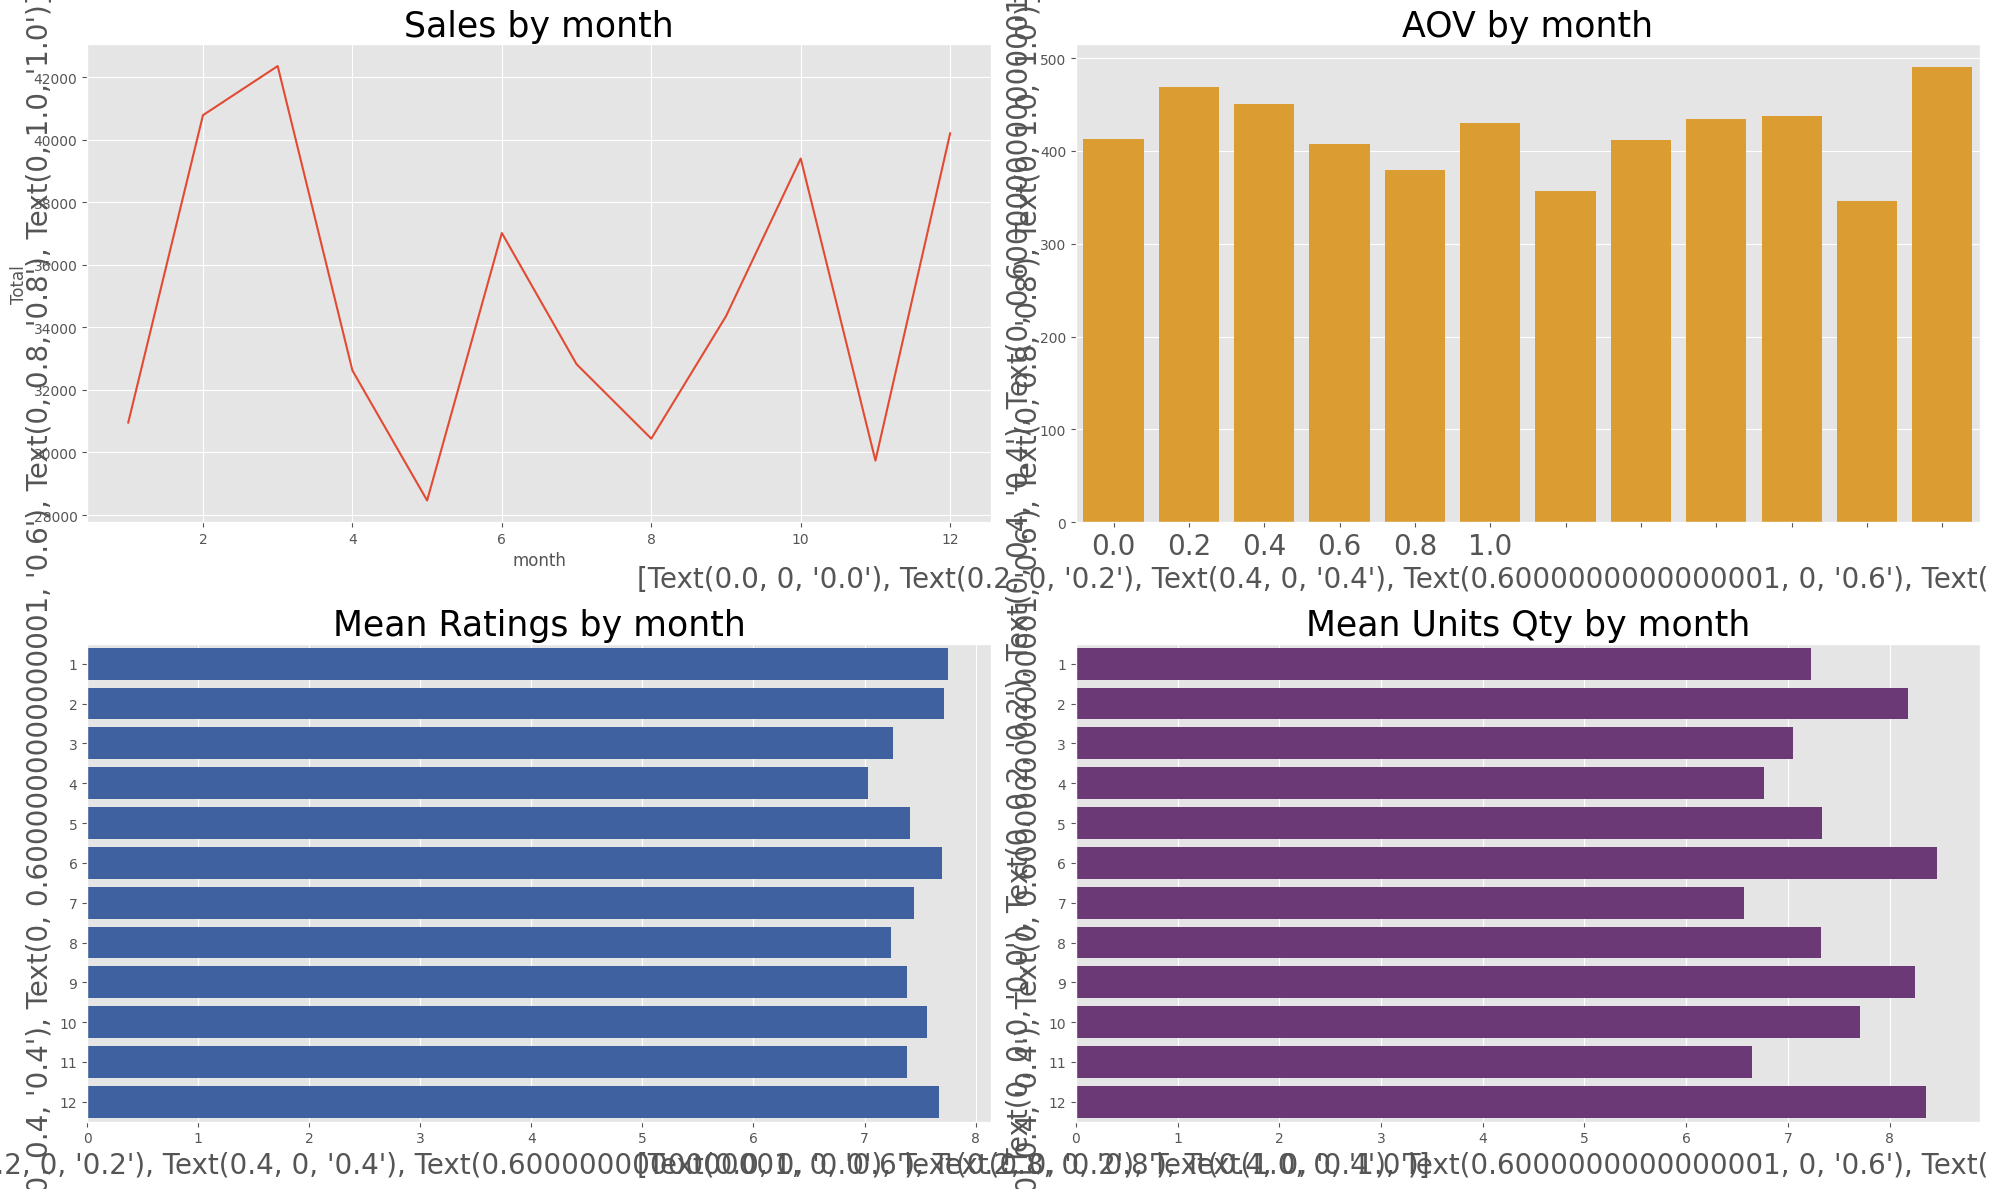

In [55]:
timeseries_analysis('month')

##### Month on Month sales - Members and Non Members 

Insights - 

* Members always have significantly more AOV than normal customers. 
* Members AOV has lesser fluctuations than Non members. 

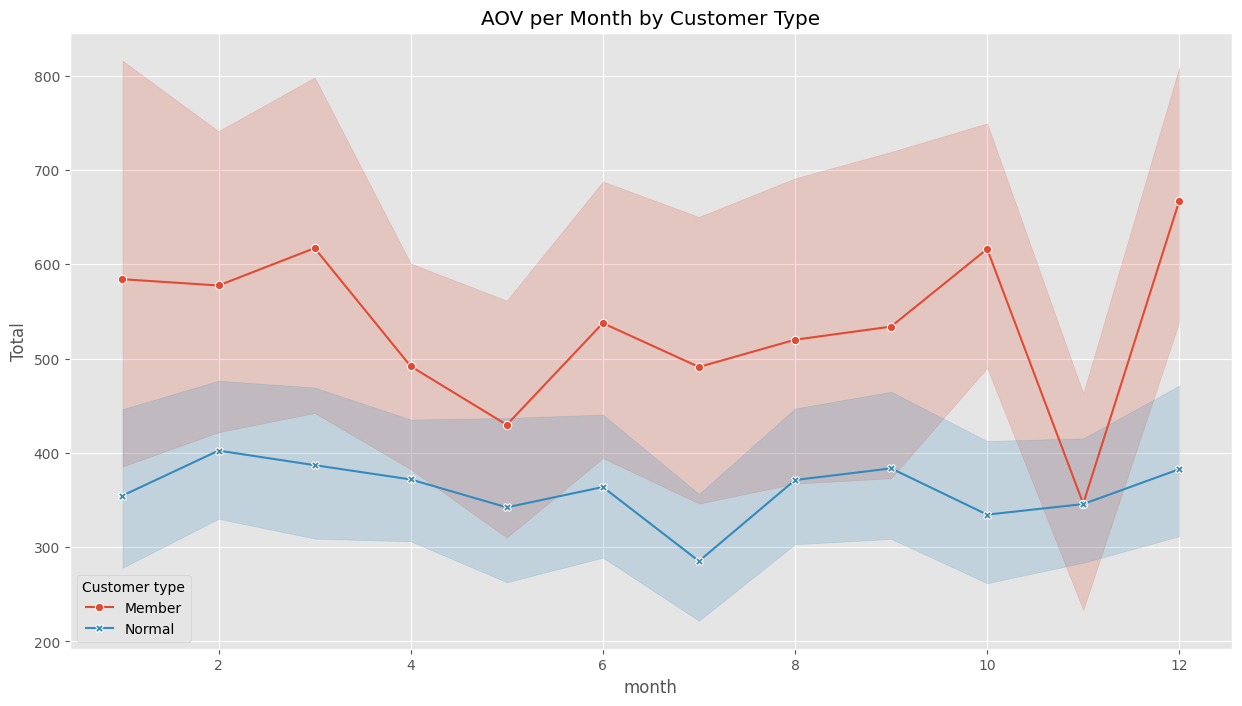

In [56]:
plt.figure(figsize=(15,8))
plt.title('AOV per Month by Customer Type')
sns.lineplot(data=sales_data_2,x='month',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False); 

###  Customers across Cities

Insights - 


* Mandalay has least unique customers (90), while Yangon hs most (200+)
* Sales per customers metric has opposite trend where each customer spends maximum in Mandalay ( 1600).


NOTE : nunique function is used to calculate distinct customers 

<Figure size 1500x800 with 0 Axes>

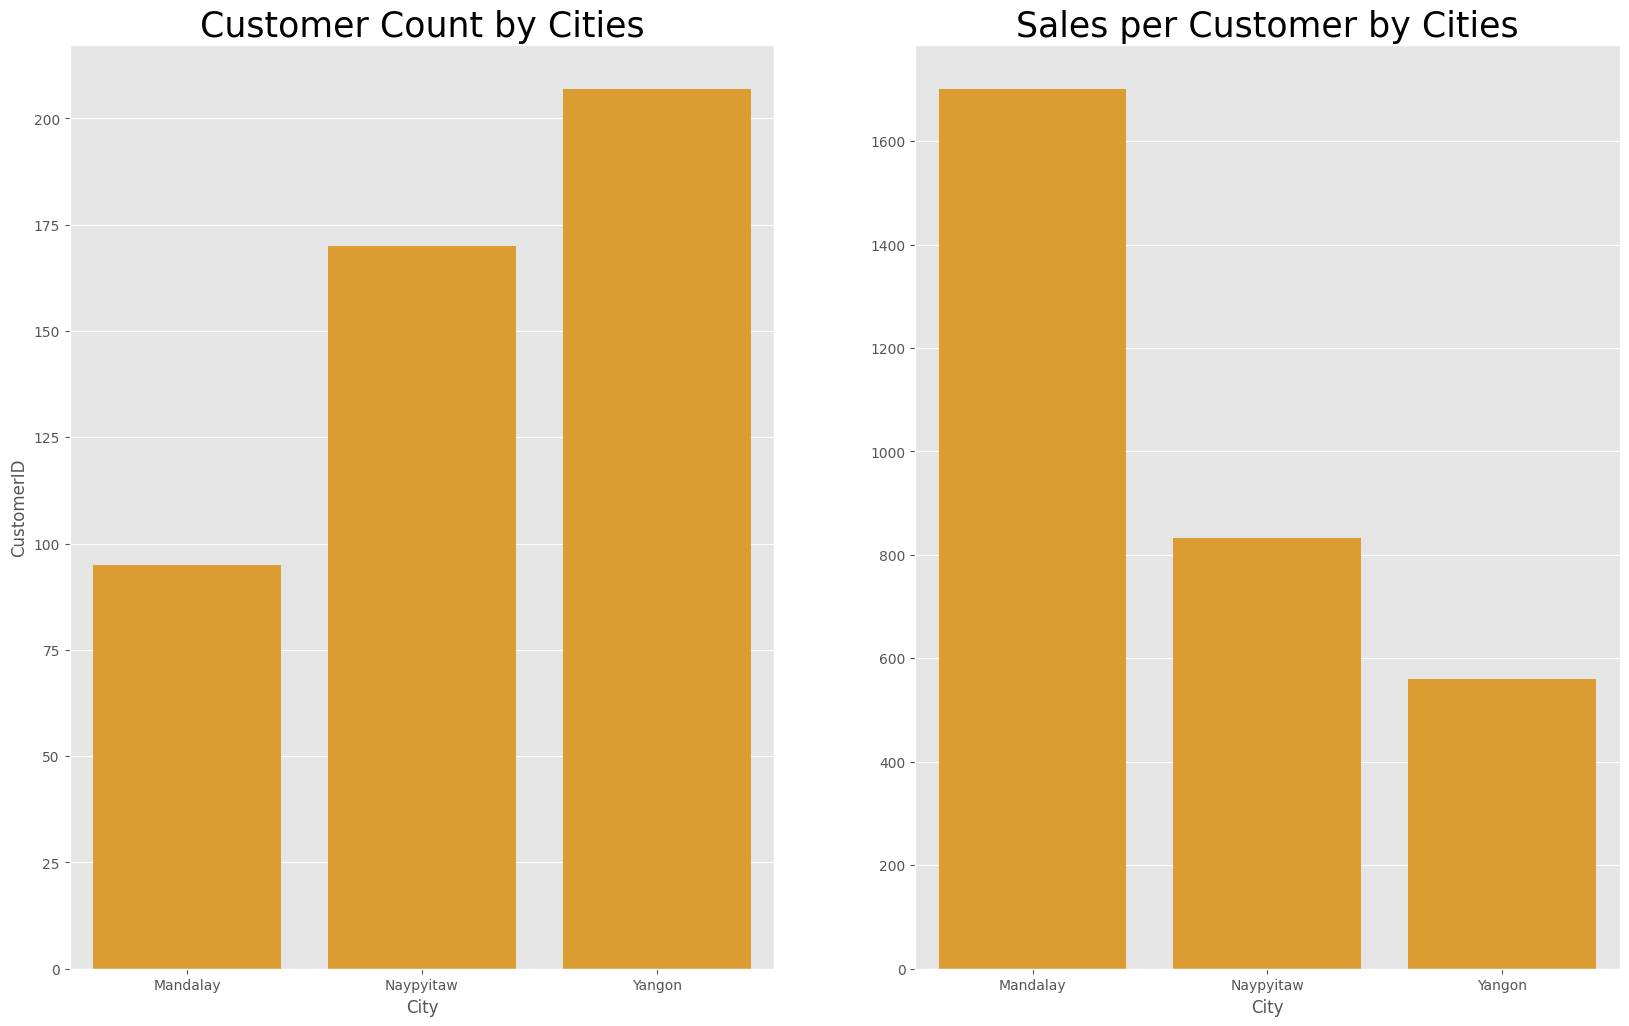

In [57]:
plt.figure(figsize=(15,8))

customer_city = sales_data_2[['City', 'CustomerID']].groupby(['City']).nunique()
sales_city= sales_data_2[["City",'Total']].groupby("City").sum()
sales_per_cx = sales_city["Total"]/customer_city["CustomerID"]

fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size

sns.barplot(x=customer_city.index, y='CustomerID', color="#f7a516",data=customer_city,ax=ax[0])  
_=ax[0].set_title("Customer Count by Cities", size = 25)                            # Chart titl for Subplot 1


sns.barplot(x=customer_city.index, y=sales_per_cx.values, color="#f7a516",ax=ax[1]) 
_=ax[1].set_title("Sales per Customer by Cities", size = 25)                            # Chart title for Subplot 2




### Member/Non-Member Deep Dive

Finally, we'll see how our Member and Non Members perform across 4 metrics that we've used for bivariate analysis. 

We'll make use of Grouped bar chart to represent the comparison in a better way - 

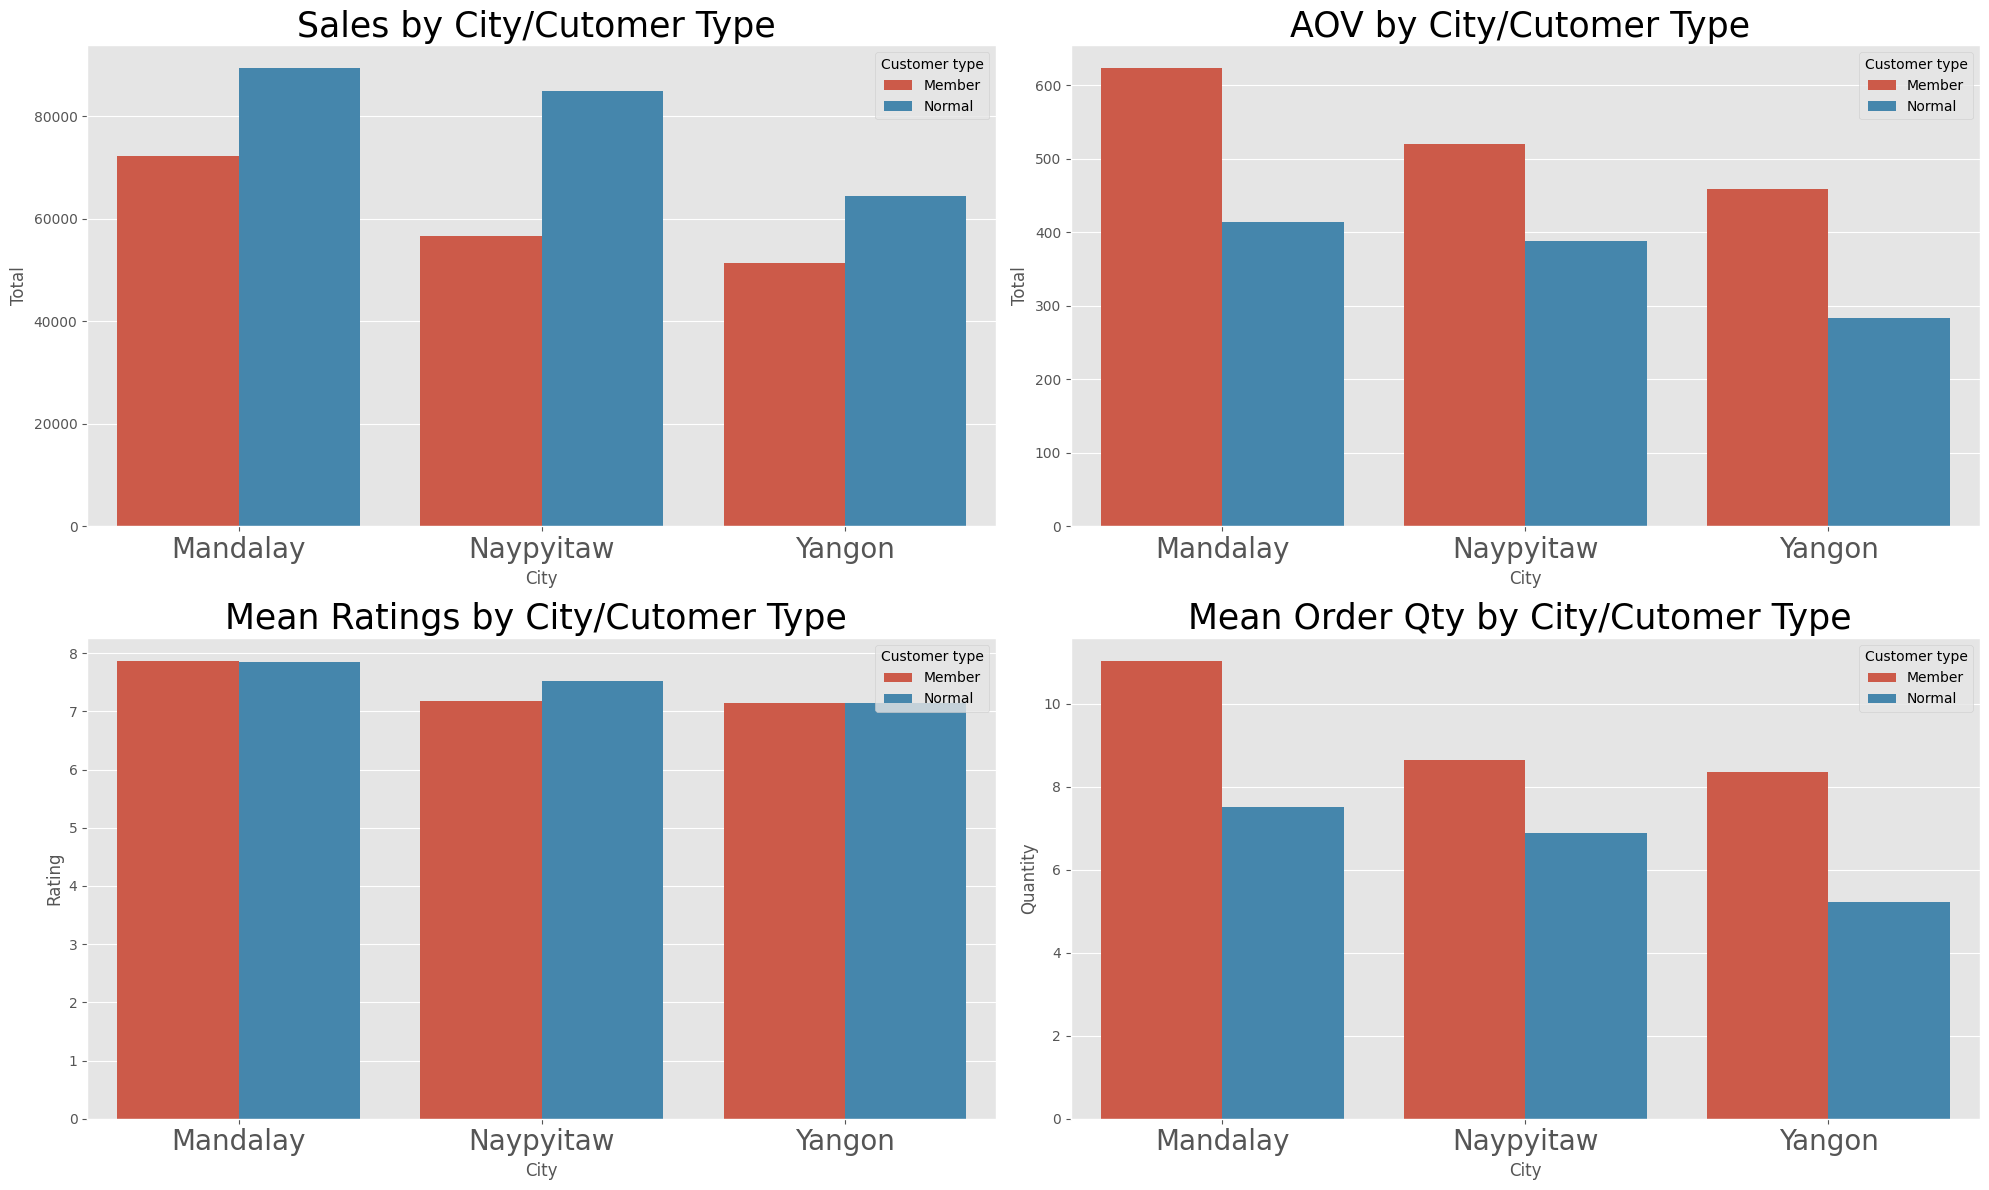

In [58]:
sales_grouped= sales_data_2[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).sum()
mean_ratings = sales_data_2[["City","Customer type",'Rating']].groupby(["City","Customer type"], as_index = False).mean()
aov  = sales_data_2[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).mean()
mean_units_qty = sales_data_2[["City",'Customer type','Quantity']].groupby(["City","Customer type"], as_index = False).mean()
                               
fig,axes= plt.subplots(nrows =2,ncols=2,figsize=(20,12)) 
                              
_=sns.barplot(x=sales_grouped["City"], y='Total',data=sales_grouped,hue = 'Customer type', ax = axes[0,0])  
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
axes[0,0].set_title("Sales by City/Cutomer Type "  , size = 25)     
                              
_=sns.barplot(x=aov["City"], y='Total',data=aov,hue = 'Customer type', ax = axes[0,1])  
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)    
axes[0,1].set_title("AOV by City/Cutomer Type "  , size = 25)  
                              
_=sns.barplot(x=mean_ratings["City"], y='Rating',data=mean_ratings,hue = 'Customer type', ax = axes[1,0])  
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), fontsize=20)    
axes[1,0].set_title("Mean Ratings by City/Cutomer Type "  , size = 25)  
                              
_=sns.barplot(x=mean_units_qty["City"], y='Quantity',data=mean_units_qty,hue = 'Customer type', ax = axes[1,1])  
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), fontsize=20)    
axes[1,1].set_title("Mean Order Qty by City/Cutomer Type "  , size = 25)  

plt.tight_layout()

Insights - 

* Normal customers have more sales in all cities. But that may be due to the fact that Non Members are higher in count as we've seen earlier.
* Members consistently have higher AOV than non members. 
* The AOV is driven by higher order quantity. 


## 5. Final Insights

As per the insights discussed so far, we can have following final recommendations -

•	The Members are doing really well in terms of sales numbers for the company. Thus a campaign can be formulated to promote the member sign ups.

•	The spike in Feb sales are a hint that the stores have the potential to have higher sales throughout the year. Specially April to November period sales can be significantly improved by some focused marketing.

•	Food & Beverages, Home and lifestyle have the maximum AOV among all categories, but constitute just 20% of the total sales together. The ratings are also better than other categories. It is a sign that a strategy around promoting these categories can be formulated.

•	It is a good sign for the supermarket chain that Females are driving majority of the sales. Even females' dominated categories such as Health & Beauty, Fashion are top product categories. The company can scale this further to improve overall revenue. Female tend to be higher spenders than Men, and company can take more advantage of this data insight.

•	Yangon has least sales and AOV of all cities and the difference is significant too. Hence a focused marketing campaign can be launched to meet the potential sale in this city.
